<a href="https://colab.research.google.com/github/gauravkinhikar97/Credit-card-default-prediction-by-Gaurav-kinhikar/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

What is customer billing statement?
A billing statement — also called an account statement — is a document that lists all of a client's charges over a given time. It shows your client how much they have been billed and when.

In [1]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# For ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

 repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.


X12-X17 What is customer billing statement? A billing statement — also called an account statement — is a document that lists all of a client's charges over a given time. It shows your client how much they have been billed and when.*italicized text*

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [6]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [15]:
corr = df.corr()
corr

""
0


In [8]:
df.isnull()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [8]:
df.columns = df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [9]:
df['Total_Bill'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

In [10]:
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [11]:
df.rename(columns = {'PAY_1':'rePAY_1','PAY_2':'rePAY_2','PAY_3':'rePAY_3','PAY_4':'rePAY_4','PAY_5':'rePAY_5','PAY_6':'rePAY_6'}, inplace = True)

In [12]:
df['Total_Pay_AMT'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']

In [13]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349,42550
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182,14490
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496,31300
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611,147181


In [14]:
df = df.astype({'LIMIT_BAL':'int'})
df = df.astype({'SEX':'int'})
df = df.astype({'EDUCATION':'int'})
df = df.astype({'MARRIAGE':'int'})
df = df.astype({'AGE':'int'})
df = df.astype({'rePAY_1':'int'})
df = df.astype({'rePAY_2':'int'})
df = df.astype({'rePAY_3':'int'})
df = df.astype({'rePAY_4':'int'})
df = df.astype({'rePAY_5':'int'})
df = df.astype({'rePAY_6':'int'})
df = df.astype({'BILL_AMT1':'int'})
df = df.astype({'BILL_AMT2':'int'})
df = df.astype({'BILL_AMT3':'int'})
df = df.astype({'BILL_AMT4':'int'})
df = df.astype({'BILL_AMT5':'int'})
df = df.astype({'BILL_AMT6':'int'})
df = df.astype({'PAY_AMT1':'int'})
df = df.astype({'PAY_AMT2':'int'})
df = df.astype({'PAY_AMT3':'int'})
df = df.astype({'PAY_AMT4':'int'})
df = df.astype({'PAY_AMT5':'int'})
df = df.astype({'PAY_AMT6':'int'})
df = df.astype({'default payment next month':'int'})
df = df.astype({'Total_Bill':'int'})
df = df.astype({'Total_Pay_AMT':'int'})
print(df.dtypes)

0
ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
rePAY_1                        int64
rePAY_2                        int64
rePAY_3                        int64
rePAY_4                        int64
rePAY_5                        int64
rePAY_6                        int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
Total_Bill                     int64
Total_Pay_AMT                  int64

In [13]:
df.describe().head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2,27370,19180
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364,870,1432


In [19]:
corr = df.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
0,,,,,,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,0.302044,0.352655
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-0.025920,-0.004882
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006,0.007750,-0.063991
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,-0.024507,-0.011222
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.054981,0.040776
rePAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.191803,-0.116810
rePAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.238182,-0.092553
rePAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.235960,-0.071732
rePAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.244561,-0.050720


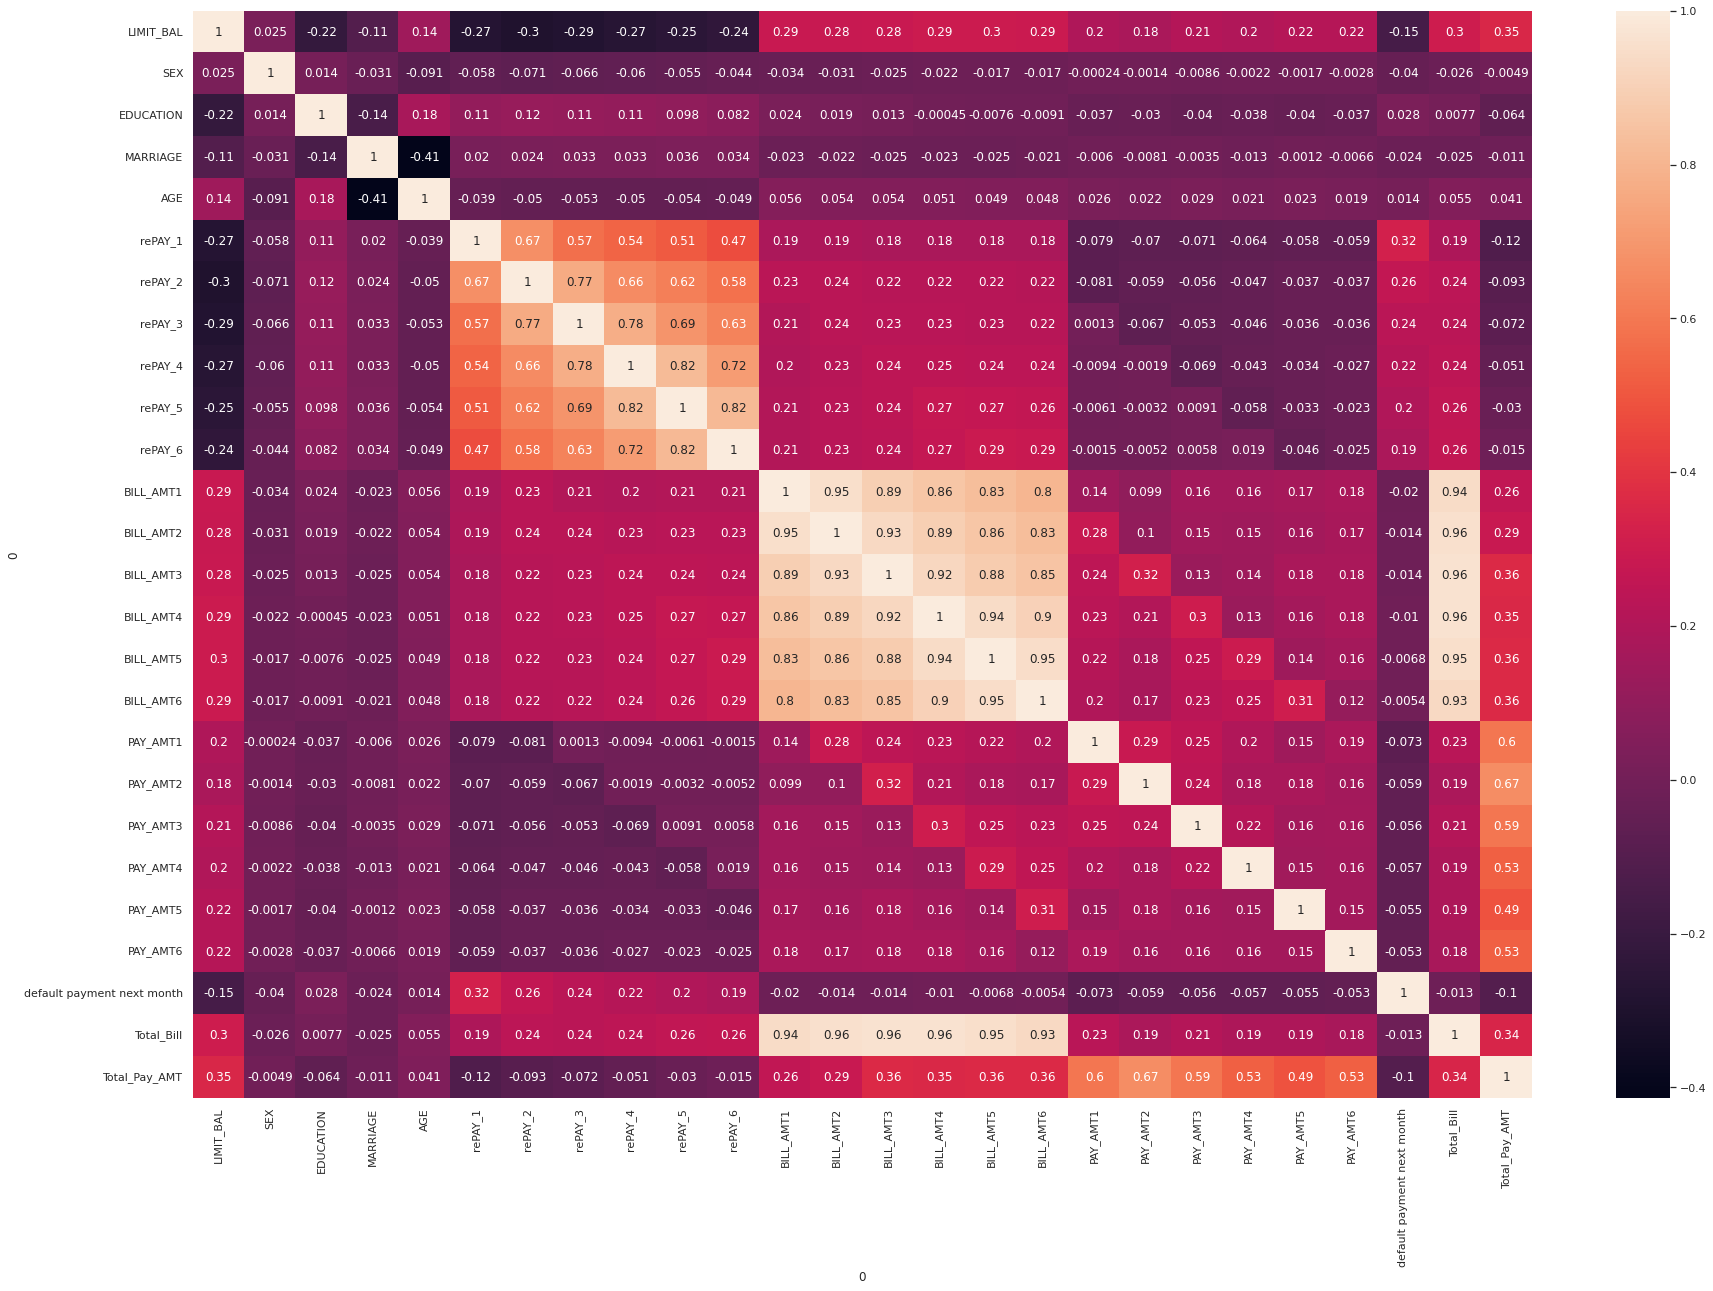

In [23]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Defaulters to Not Defaulters')

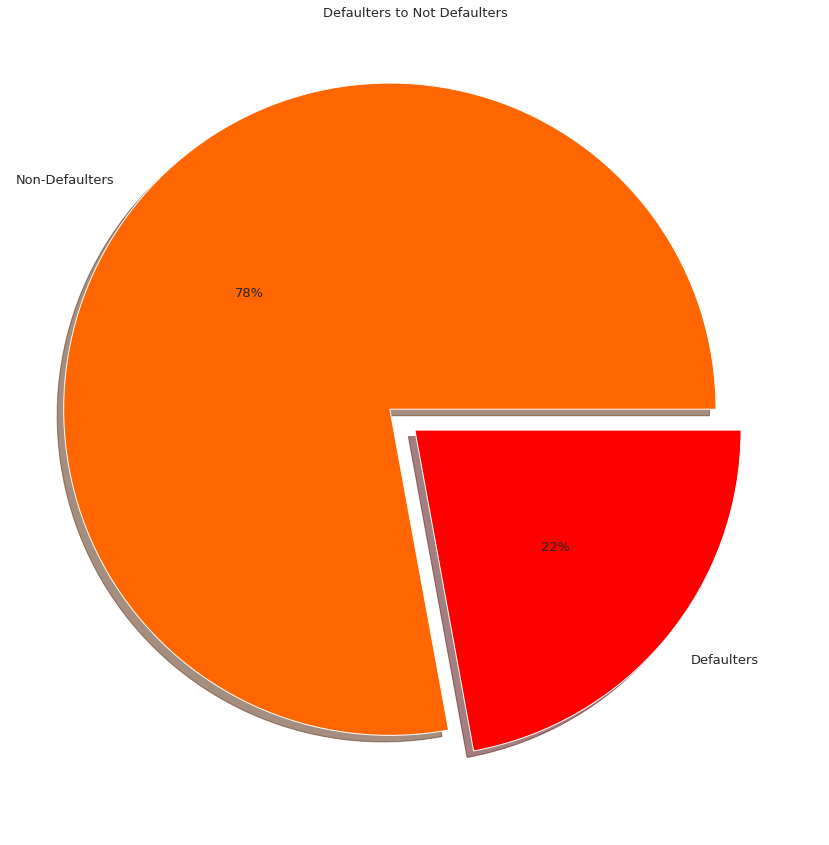

In [ ]:
# Creating a subplots
plt.figure(figsize = (25,15))

plt.subplot()
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%2.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#FF6600','#FF0000'])
plt.title('Defaulters to Not Defaulters',fontdict={'size':13})

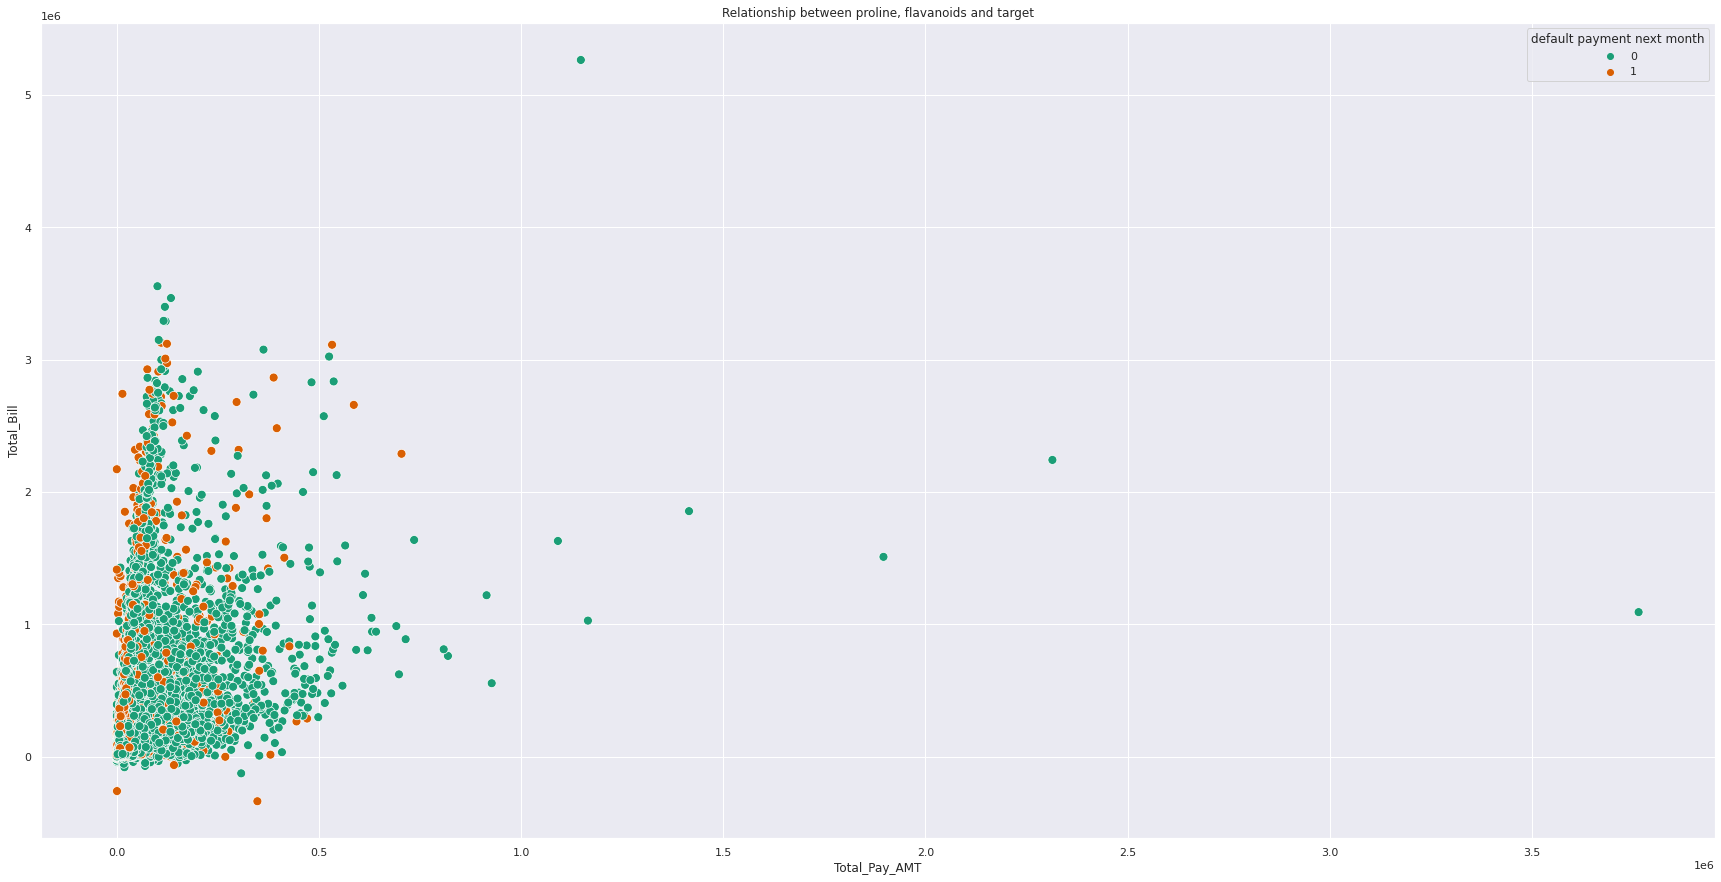

In [ ]:
plt.figure(figsize=(30,15))
sns.scatterplot(x="Total_Pay_AMT", y="Total_Bill", hue="default payment next month", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

In [35]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349,42550
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182,14490
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496,31300
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611,147181


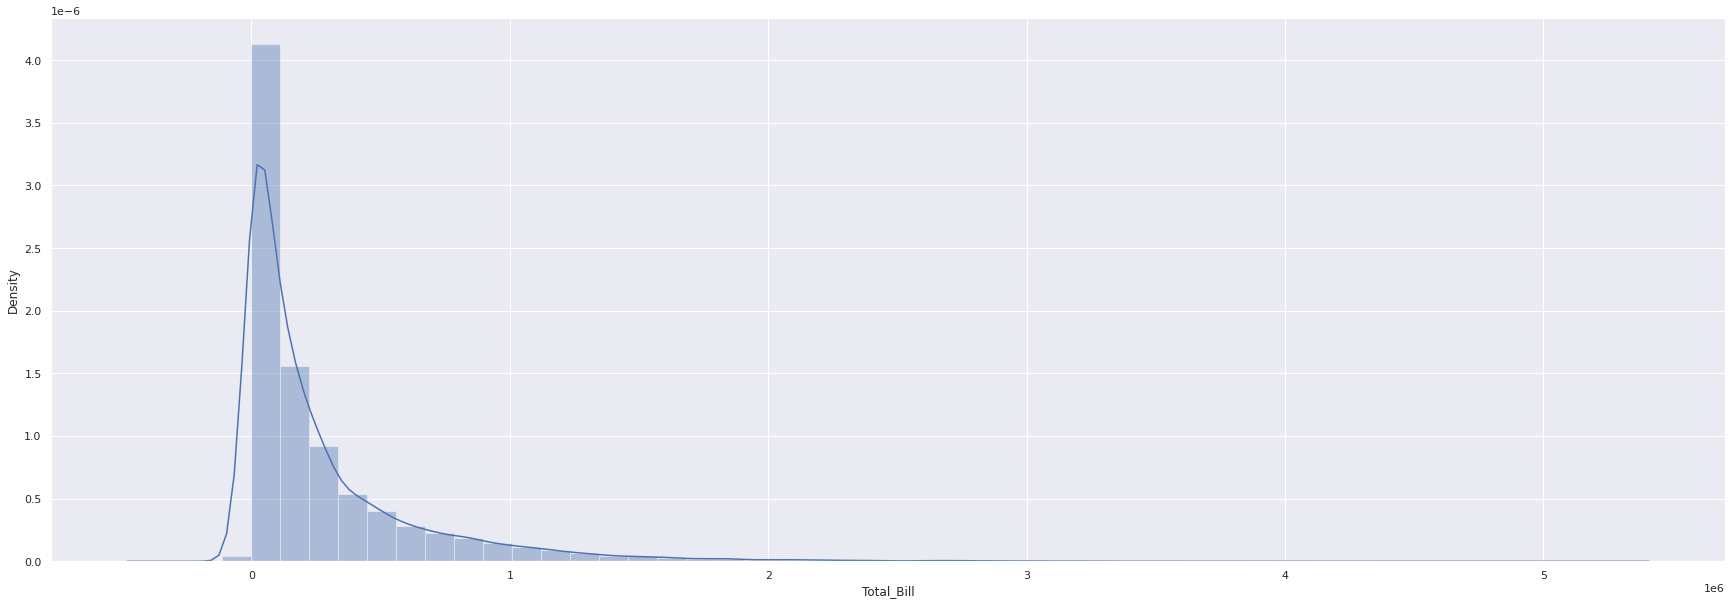

In [ ]:
plt.figure(figsize=(30,10))
sns.distplot(df['Total_Bill'])
plt.show()

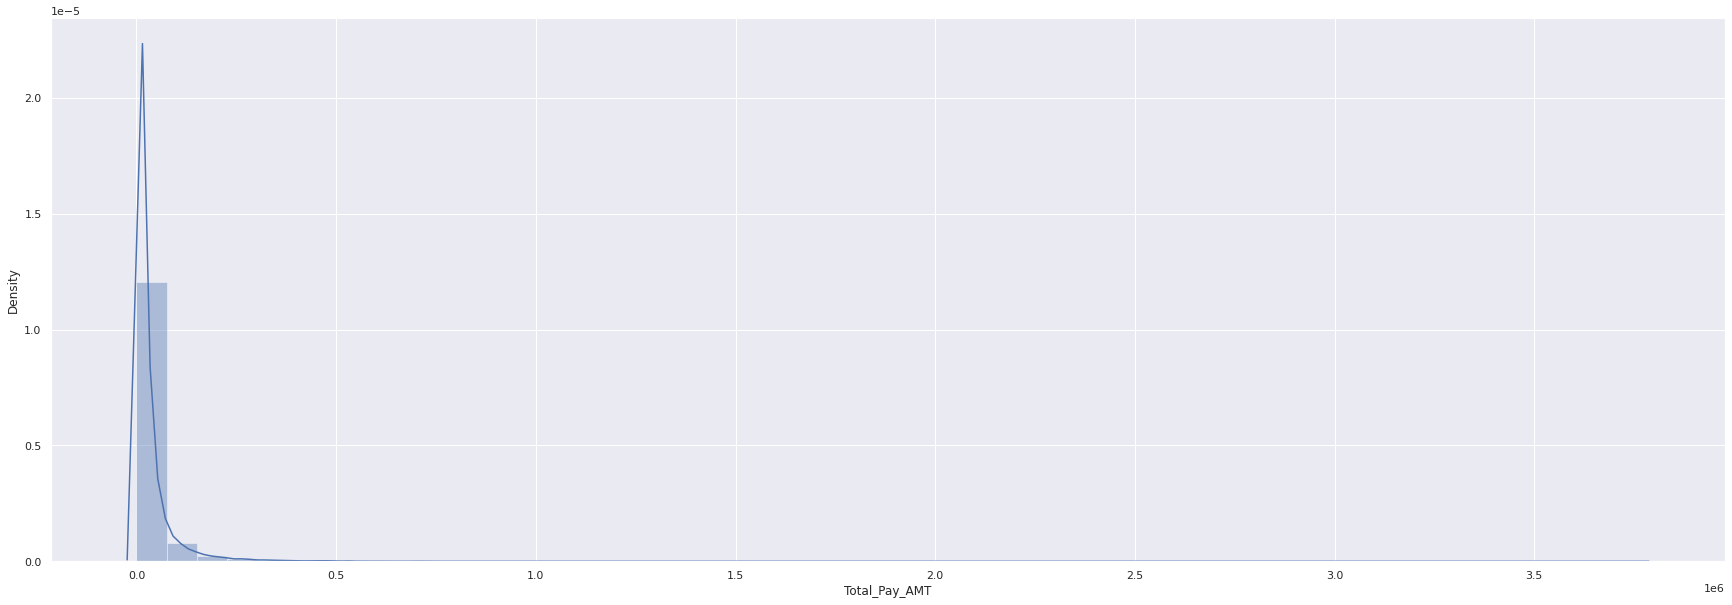

In [ ]:
plt.figure(figsize=(30,10))
sns.distplot(df['Total_Pay_AMT'])
plt.show()

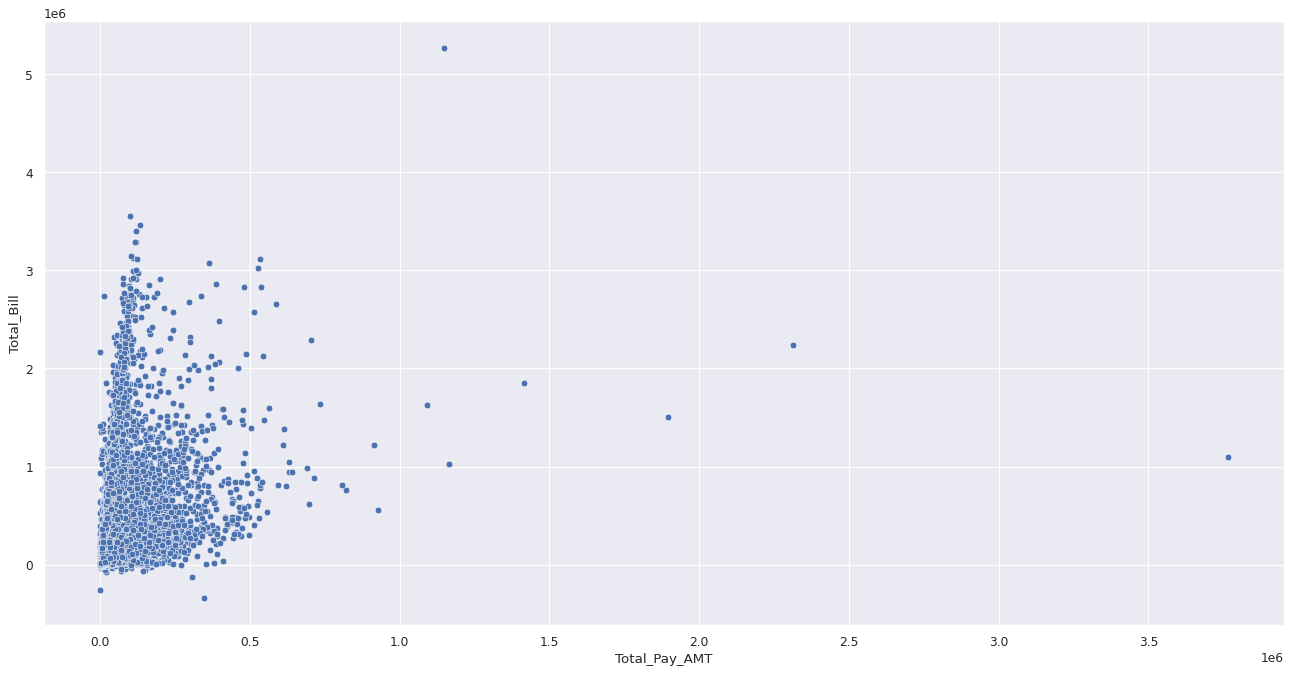

In [35]:
plt.figure(figsize=(20,10), dpi=80)
sns.scatterplot(df["Total_Pay_AMT"],df['Total_Bill'],palette="Dark2")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.FacetGrid(df, row='default payment next month', col = 'Total_Bill').map(sns.histplot, 'EDUCATION')
plt.show()

<Figure size 1440x2160 with 0 Axes>

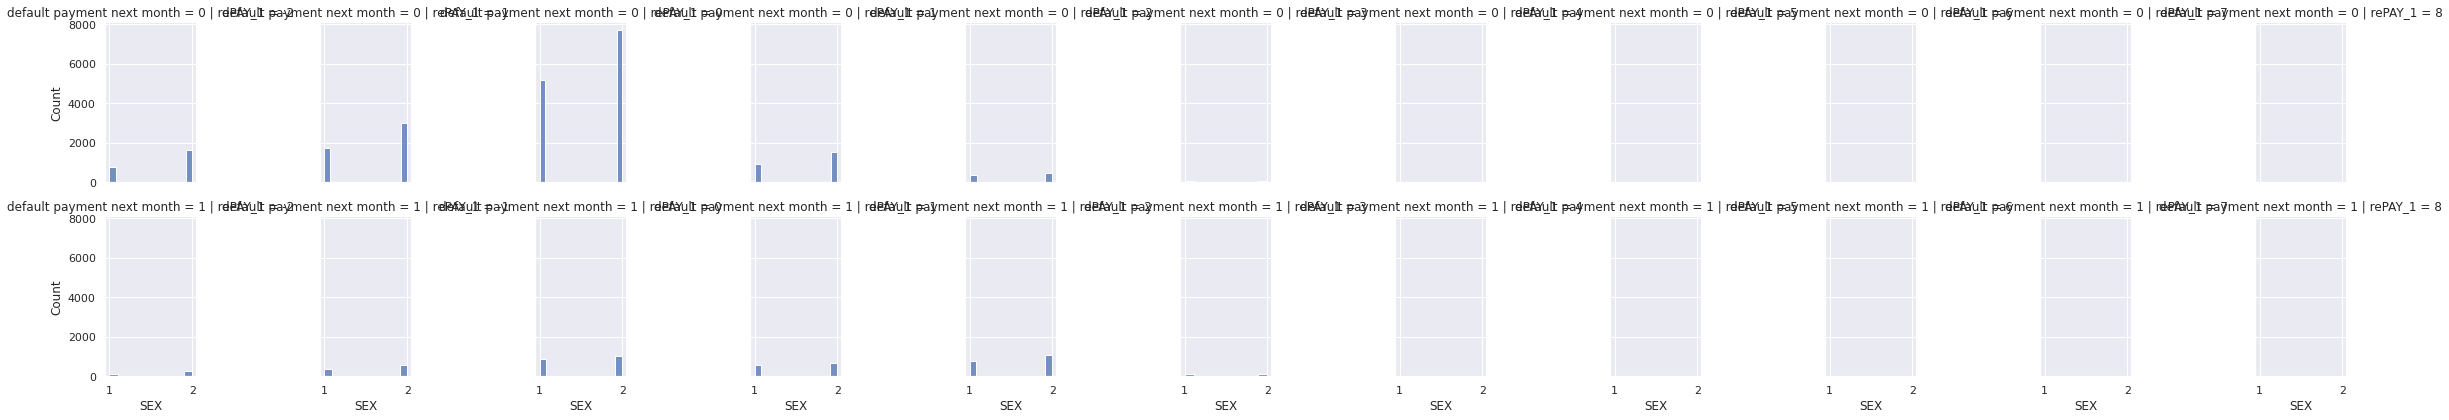

In [ ]:
plt.figure(figsize=(20,30))
sns.FacetGrid(df, row='default payment next month', col = 'rePAY_1').map(sns.histplot, 'SEX')
plt.show()

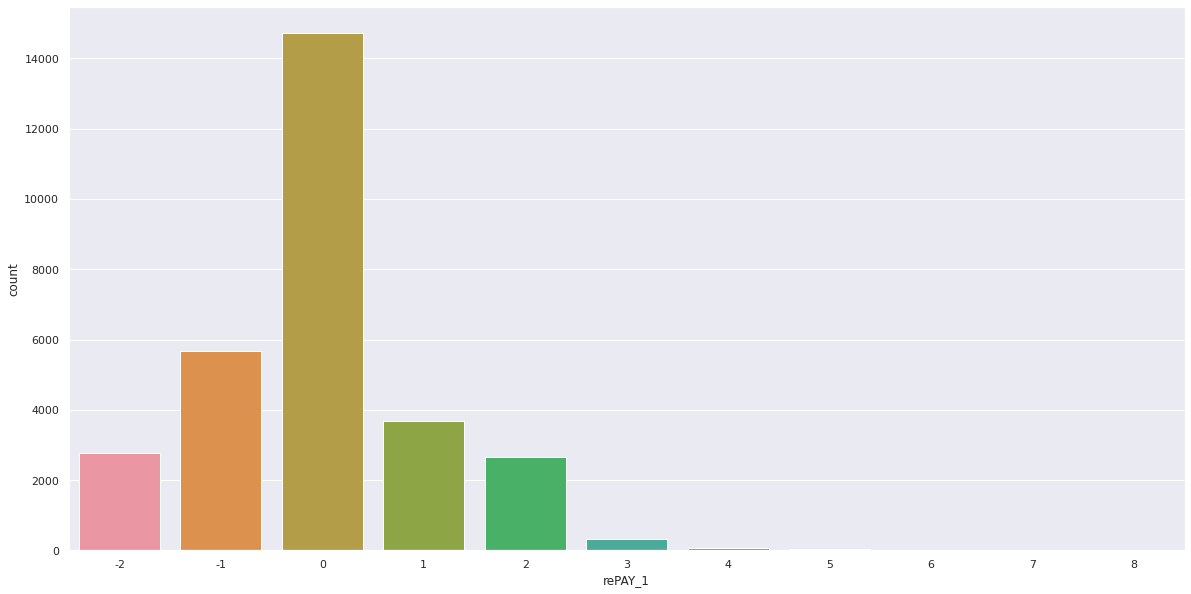

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot('rePAY_1',data = df)

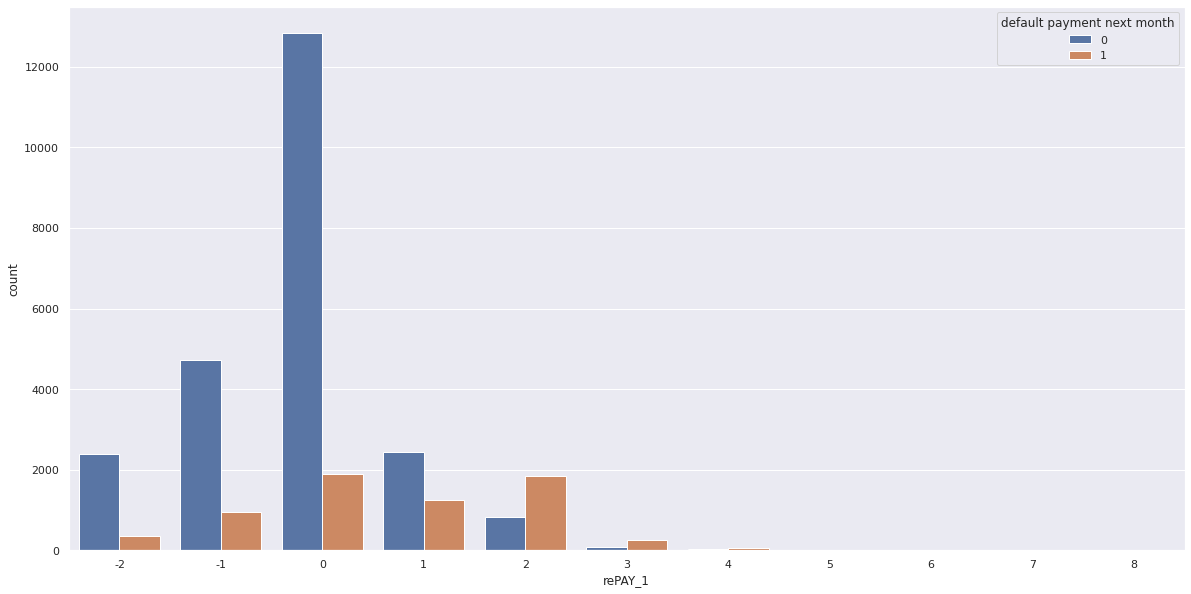

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['rePAY_1'],hue=df['default payment next month'])

In [ ]:
fil = (df.rePAY_1 == 0) | (df.rePAY_1 == 5) | (df.rePAY_1 == 6) 
df.loc[fil, 'EDUCATION'] = 4

In [ ]:
df.drop(df['ID'],inplace = True)# do not used this for understanding gauarv kinhikar

In [ ]:
df.drop(['ID'], axis=1) 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,90000,2,4,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,50000,2,4,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,4,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349,42550
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182,14490
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496,31300
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611,147181


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,3,90000,2,4,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,4,50000,2,4,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049


3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [ ]:
df.value_counts('EDUCATION')

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
dtype: int64

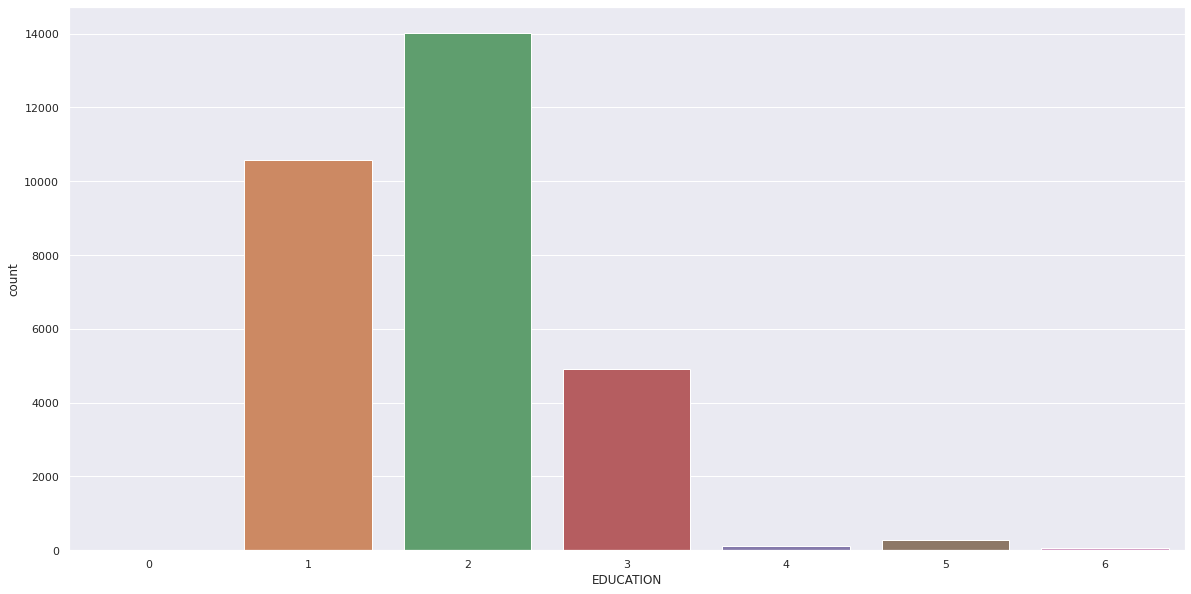

In [ ]:
sns.countplot('EDUCATION',data = df)
plt.rcParams['figure.figsize'] = (25, 5)

In [ ]:
fil = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6) 
df.loc[fil, 'EDUCATION'] = 4

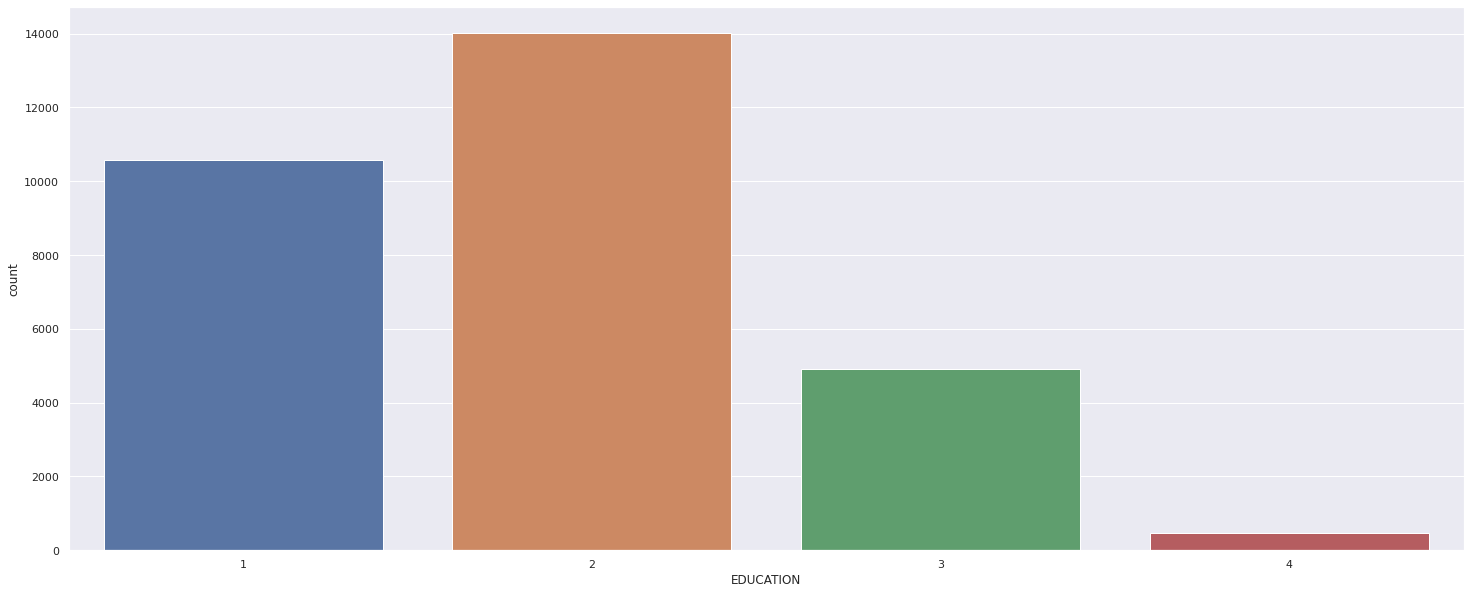

In [ ]:
sns.countplot('EDUCATION',data = df)
plt.rcParams['figure.figsize'] = (25,10)

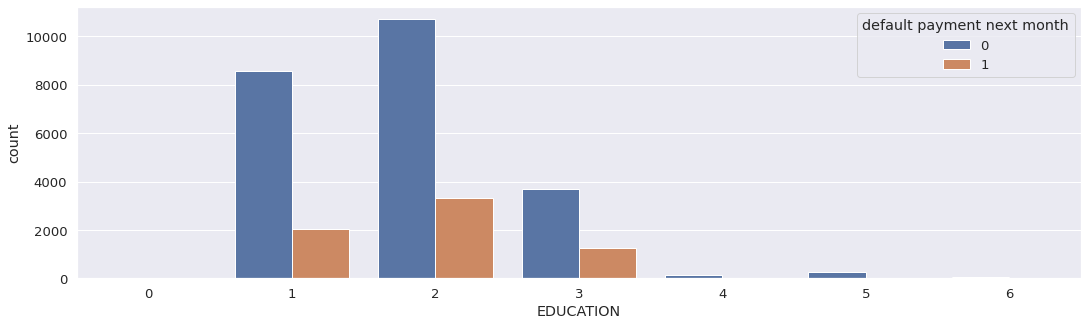

In [43]:
sns.countplot(x=df['EDUCATION'],hue=df['default payment next month'])
plt.rcParams['figure.figsize'] = (25,10)

In [ ]:
df.value_counts('MARRIAGE')

MARRIAGE
2    15964
1    13659
3      323
0       54
dtype: int64

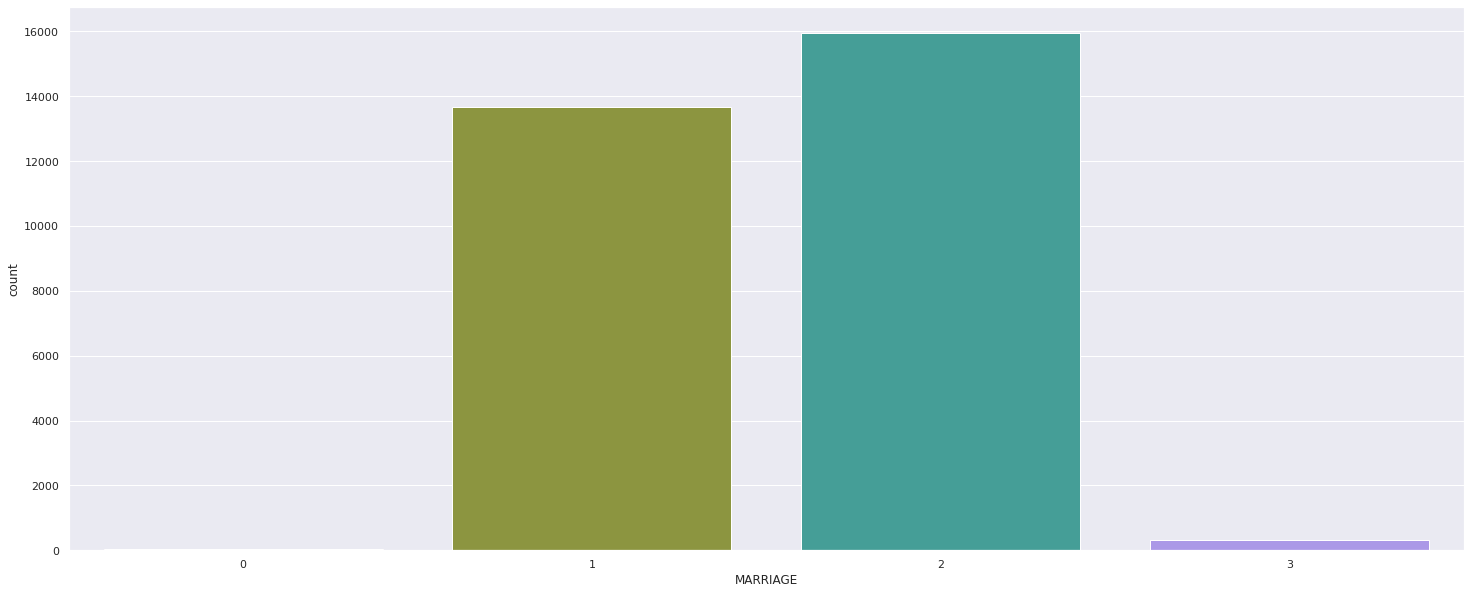

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['MARRIAGE'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

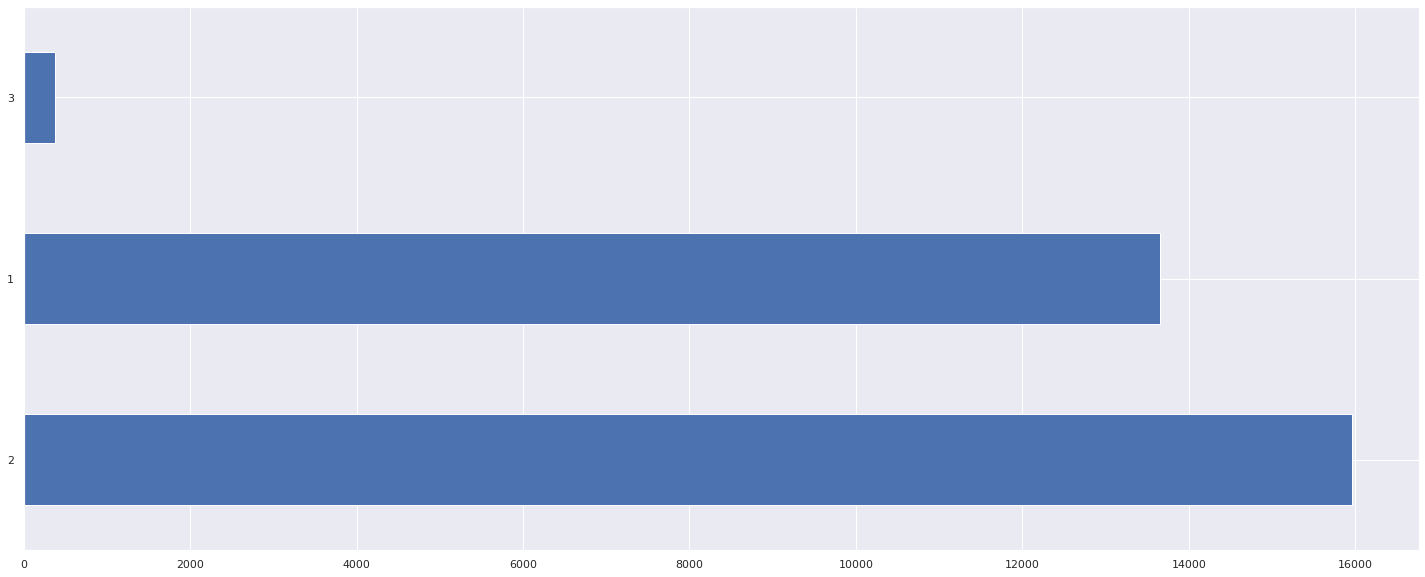

In [ ]:
df.MARRIAGE.value_counts().plot(kind = 'barh')

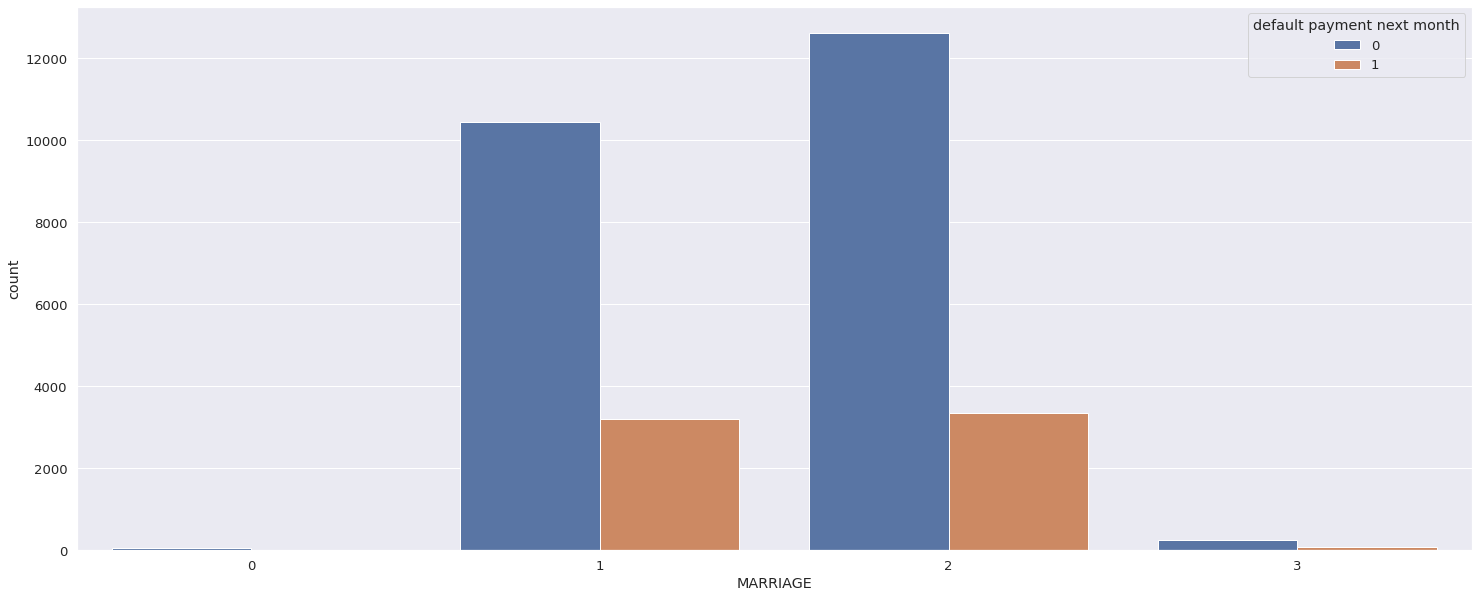

In [44]:
sns.countplot(x=df['MARRIAGE'],hue=df['default payment next month'])
plt.rcParams['figure.figsize'] = (18, 5)

In [ ]:
# Creating a subplots
plt.figure(figsize = (16,10))

# Subplot 1
plt.subplot(221)
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%1.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#8ABBDB','#367AAB'])
plt.title('Defaulters to Not Defaulters',fontdict={'size':13})

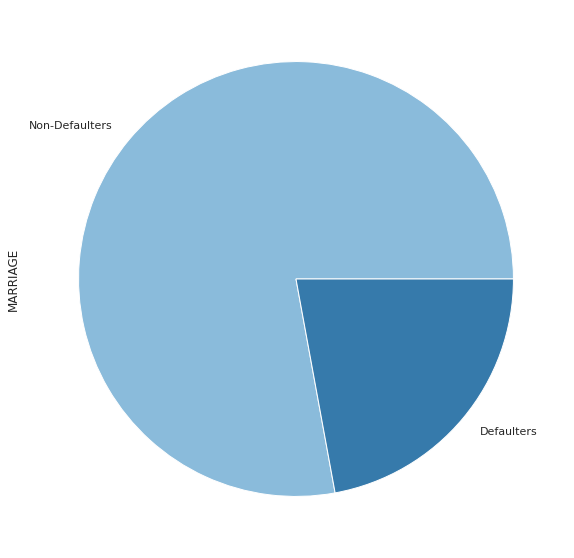

In [31]:
plt.figure(figsize=(12,10))
df.groupby('default payment next month').MARRIAGE.count().plot(kind='pie',labels=['Non-Defaulters','Defaulters'],colors= ['#8ABBDB','#367AAB'])
plt.show()

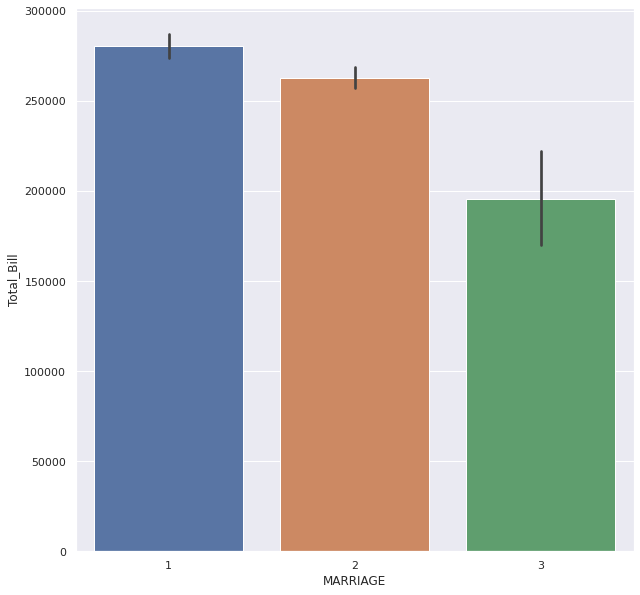

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['MARRIAGE'],df['Total_Bill'])
plt.show()

In [ ]:
df['SEX'].unique()

array([2, 1], dtype=object)

In [ ]:
df.value_counts('SEX')

SEX
2    18112
1    11888
dtype: int64

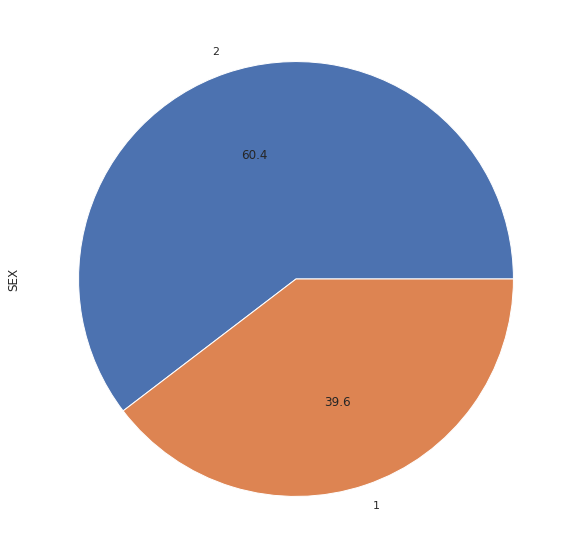

In [ ]:
plt.figure(figsize=(12,10))
df['SEX'].value_counts().plot(kind='pie',autopct="%.1f")
plt.show()

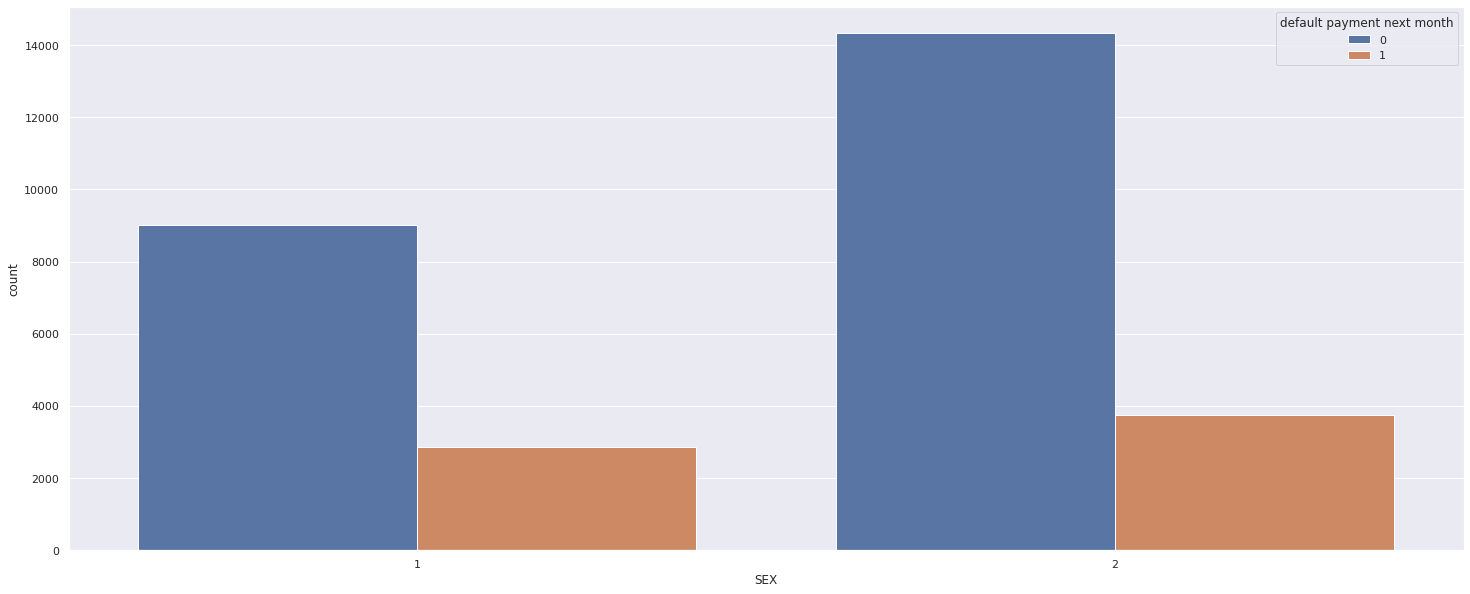

In [ ]:
sns.countplot(x=df['SEX'],hue=df['default payment next month'])
plt.rcParams['figure.figsize'] = (18, 5)

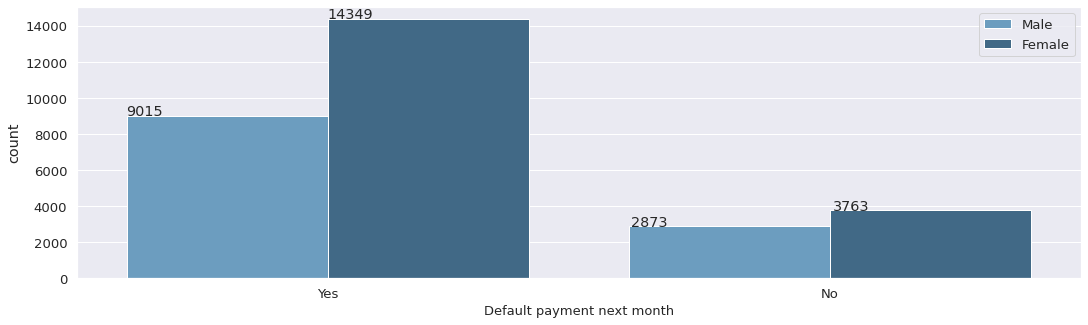

In [60]:
ax=sns.countplot(df['default payment next month'],hue=df['SEX'],palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Yes','No'])
plt.legend(['Male','Female'])
plt.xlabel('Default payment next month',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

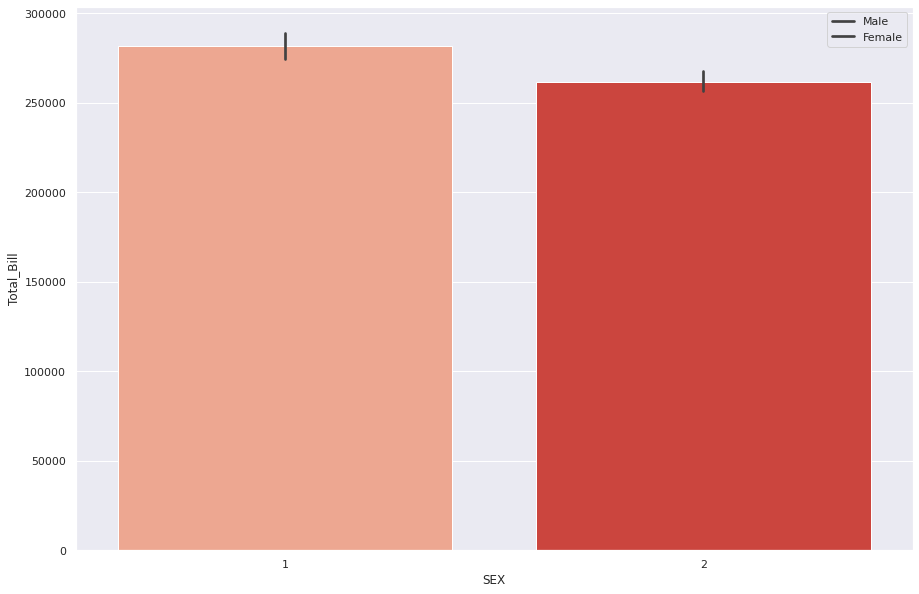

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(df['SEX'],df['Total_Bill'],palette='Reds')
plt.legend(['Male','Female'])
plt.show()

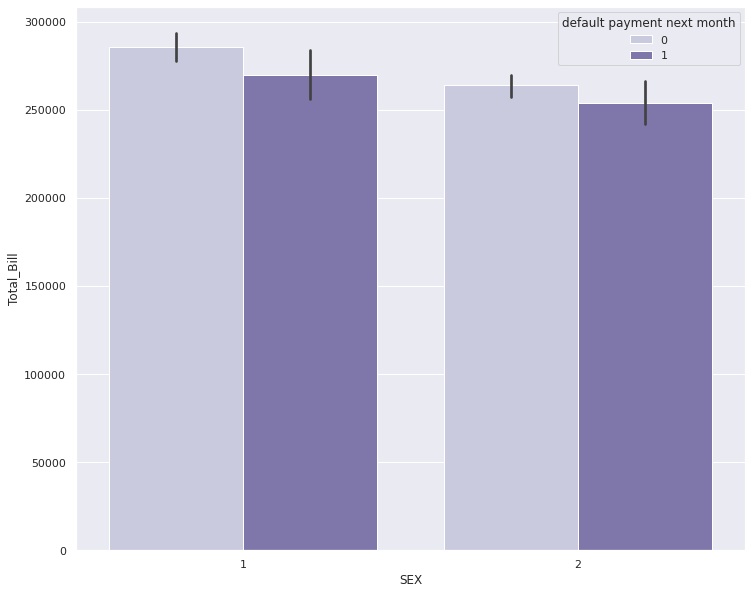

In [17]:
plt.figure(figsize=(12,10))
sns.barplot(df["SEX"],df["Total_Bill"],df["default payment next month"],palette='Purples')
plt.show()

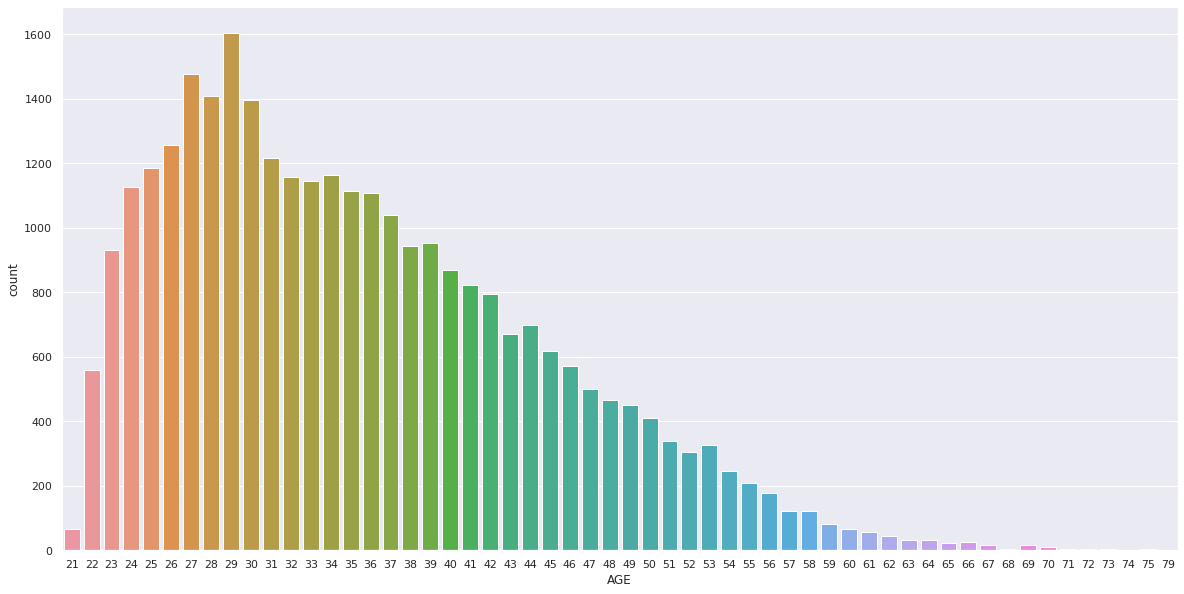

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df.AGE)
plt.show()

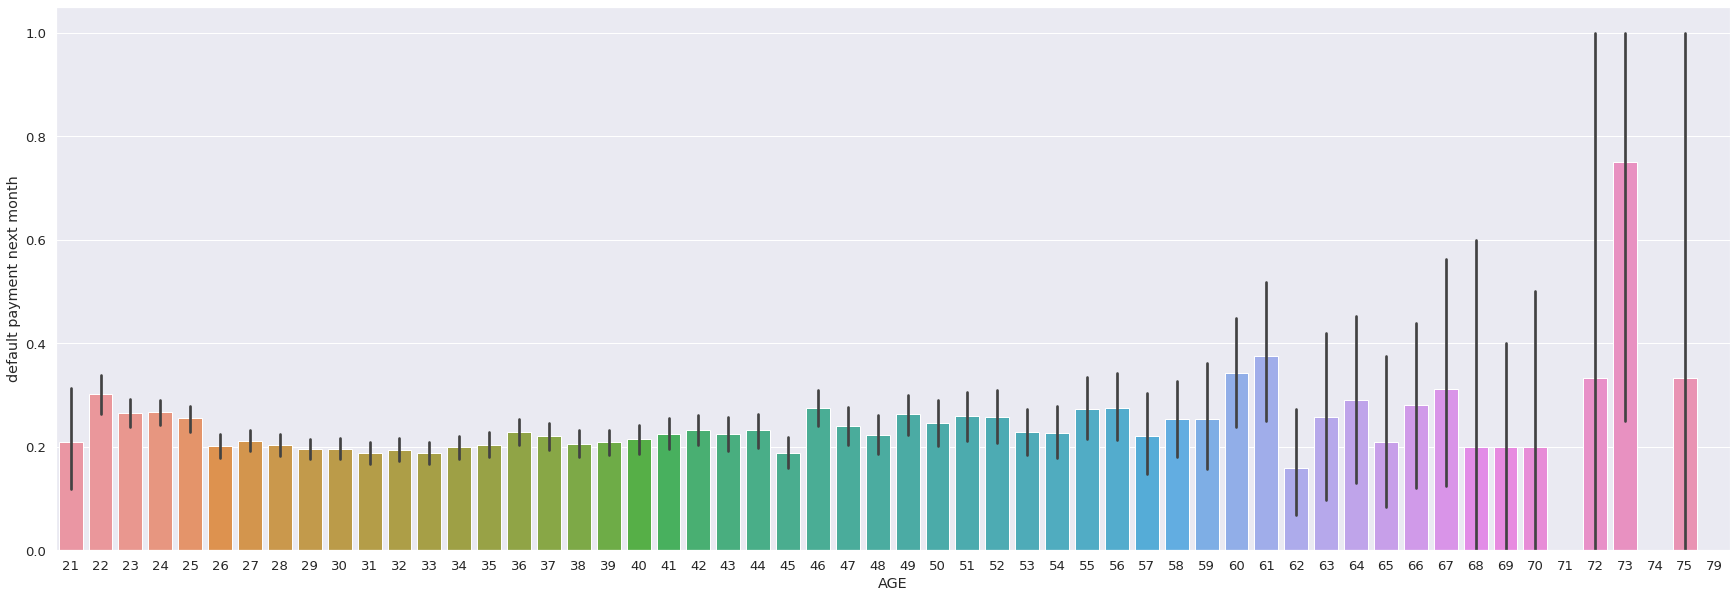

In [47]:
plt.figure(figsize=(30,10))
sns.barplot(df['AGE'],df['default payment next month'])
plt.show()

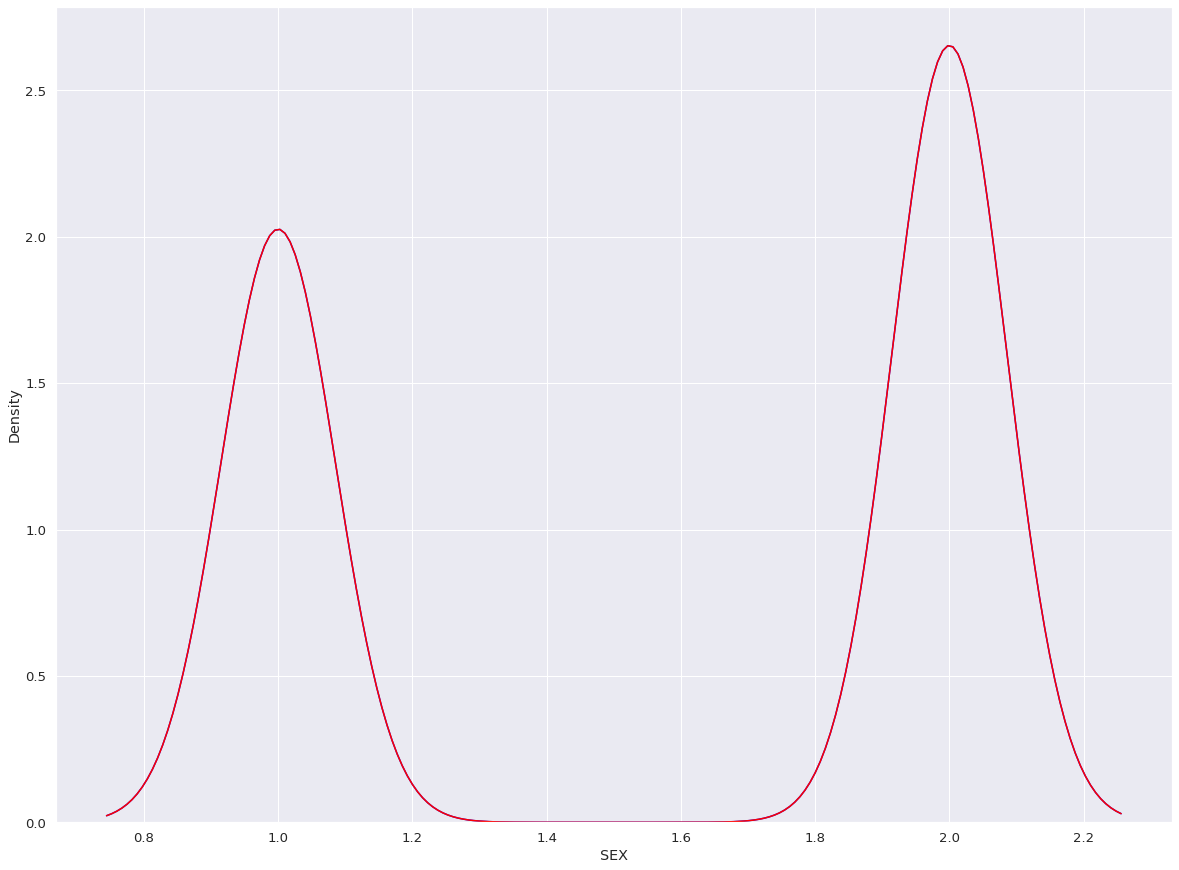

In [59]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['default payment next month']==1]['SEX'], hist=False, color="blue") 
sns.distplot(df[df['default payment next month']==1]['SEX'], hist=False, color="red")
plt.show()

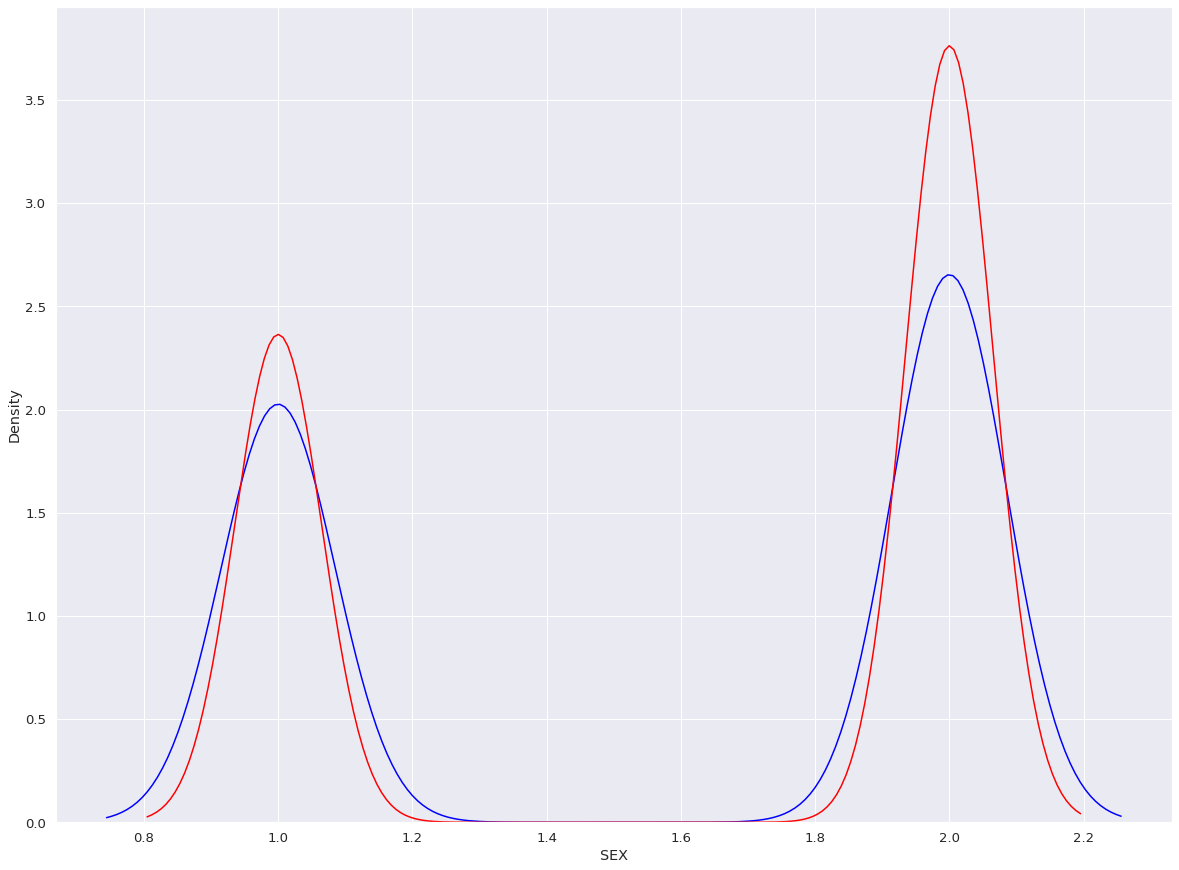

In [53]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['default payment next month'] == 1]['SEX'], hist=False, color="blue") 
sns.distplot(df[df['default payment next month'] == 0]['SEX'], hist=False, color="red")
plt.show()

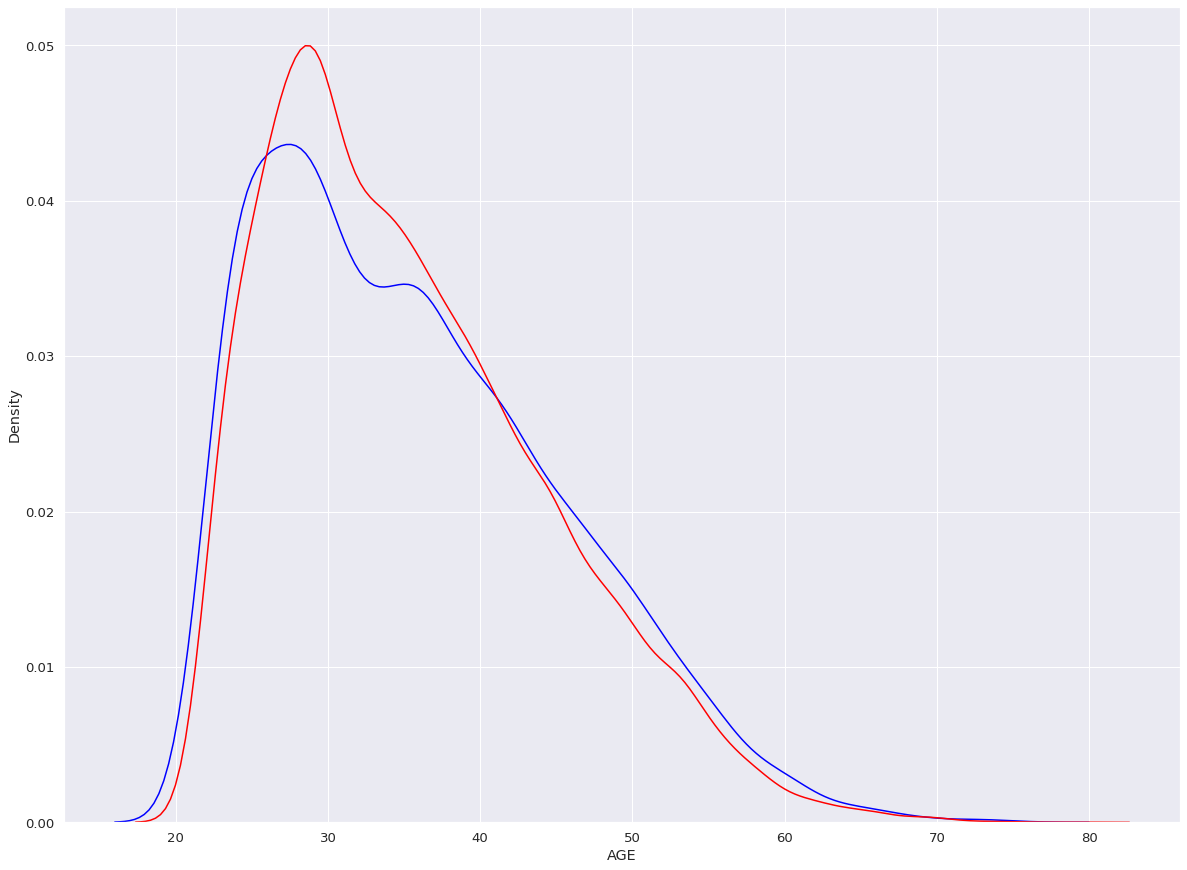

In [55]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['default payment next month'] == 1]['AGE'], hist=False, color="blue") 
sns.distplot(df[df['default payment next month'] == 0]['AGE'], hist=False, color="red")
plt.show()

In [ ]:
df[['Total_Pay_AMT','Total_Bill']].corr()

""
0


In [ ]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4']].corr()

""
0


In [ ]:
df['PAY_0'].corr(df['PAY_2'])

In [ ]:
df['BILL_AMT1'].corr(df['PAY_AMT1'])

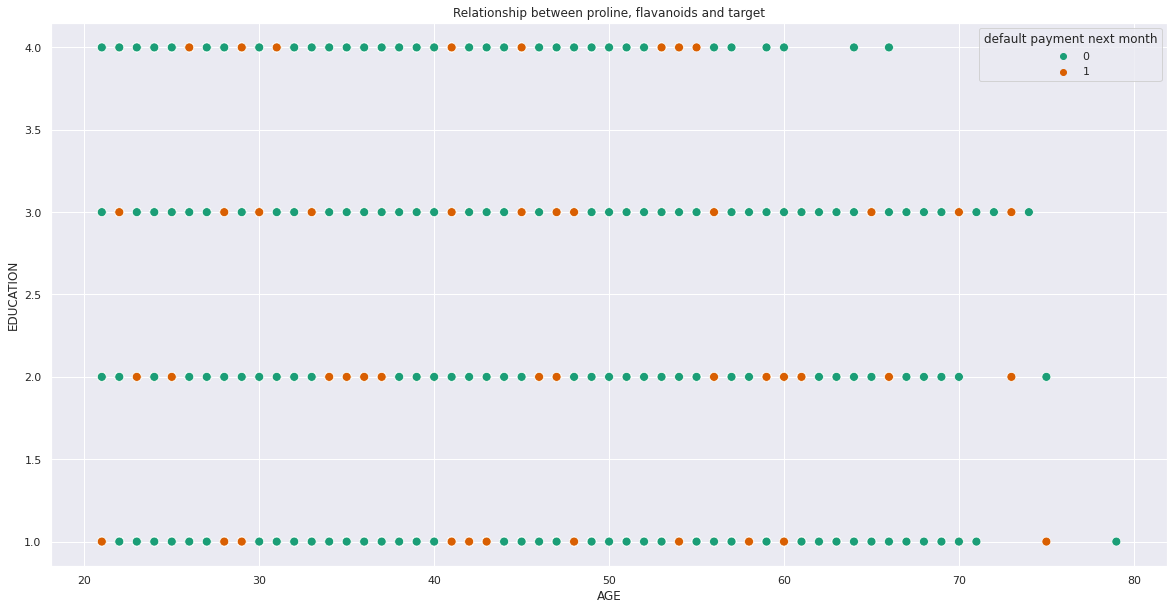

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="AGE", y="EDUCATION", hue="default payment next month", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

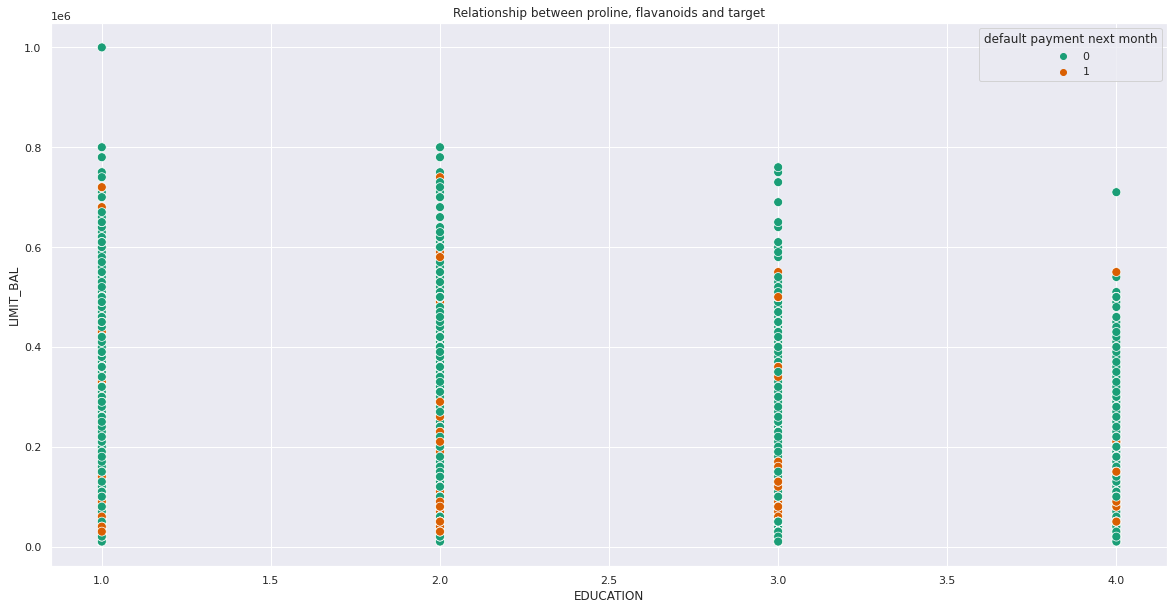

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="EDUCATION", y="LIMIT_BAL", hue="default payment next month", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

In [ ]:
df.groupby(['EDUCATION', 'AGE']).mean()

In [25]:
deafaulters_df = df[df['default payment next month'] == 1]
deafaulters_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Pay_AMT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
14,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1,338685,10700
17,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1,106161,6350
22,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1,1896,1580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29992,210000,1,2,1,34,3,2,2,2,2,2,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1,15000,0
29995,29995,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1,470933,21500
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496,31300
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611,147181


In [26]:
corr = df.corr()
corr

""
0


In [ ]:
long_english_movies = df[(df['default payment next month']==1) & (df['MARRIAGE']==2)]
long_english_movies.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
14,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
17,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
23,23,70000,2,2,2,26,2,0,0,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,1
27,27,60000,1,1,2,27,1,-2,-1,-1,...,-57,127,-189,0,1000,0,500,0,1000,1
32,32,50000,1,2,2,33,2,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,1
39,39,50000,1,1,2,25,1,-1,-1,-2,...,0,0,0,780,0,0,0,0,0,1
46,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
47,47,20000,2,1,2,22,0,0,2,-1,...,16341,16675,0,3000,0,16741,334,0,0,1
48,48,150000,2,5,2,46,0,0,-1,0,...,1170,0,0,1013,1170,0,0,0,0,1


In [ ]:
long_english_movies = df[(df['default payment next month']==1) & (df['MARRIAGE']==1)]
long_english_movies.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
22,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
24,24,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
61,61,500000,2,3,1,28,0,0,0,0,...,14937,13827,15571,1516,1300,1000,1000,2000,2000,1
64,64,50000,2,2,1,46,0,0,0,-2,...,0,0,0,1000,0,0,0,0,0,1
66,66,200000,1,1,1,57,-2,-2,-2,-1,...,8174,8198,7918,0,0,8222,300,0,1000,1
67,67,10000,1,2,1,56,2,2,2,0,...,4062,4196,4326,2300,0,150,200,200,160,1
87,87,360000,2,1,1,45,-1,-1,2,0,...,390,390,390,1170,0,0,390,390,390,1
91,91,200000,1,1,1,53,2,2,2,2,...,144098,147124,149531,6300,5500,5500,5500,5000,5000,1
100,100,20000,1,2,1,38,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


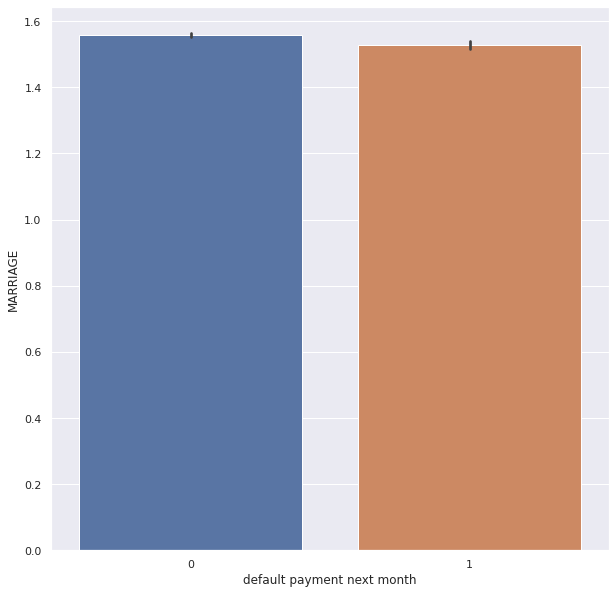

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['default payment next month'],df['MARRIAGE'])
plt.show()

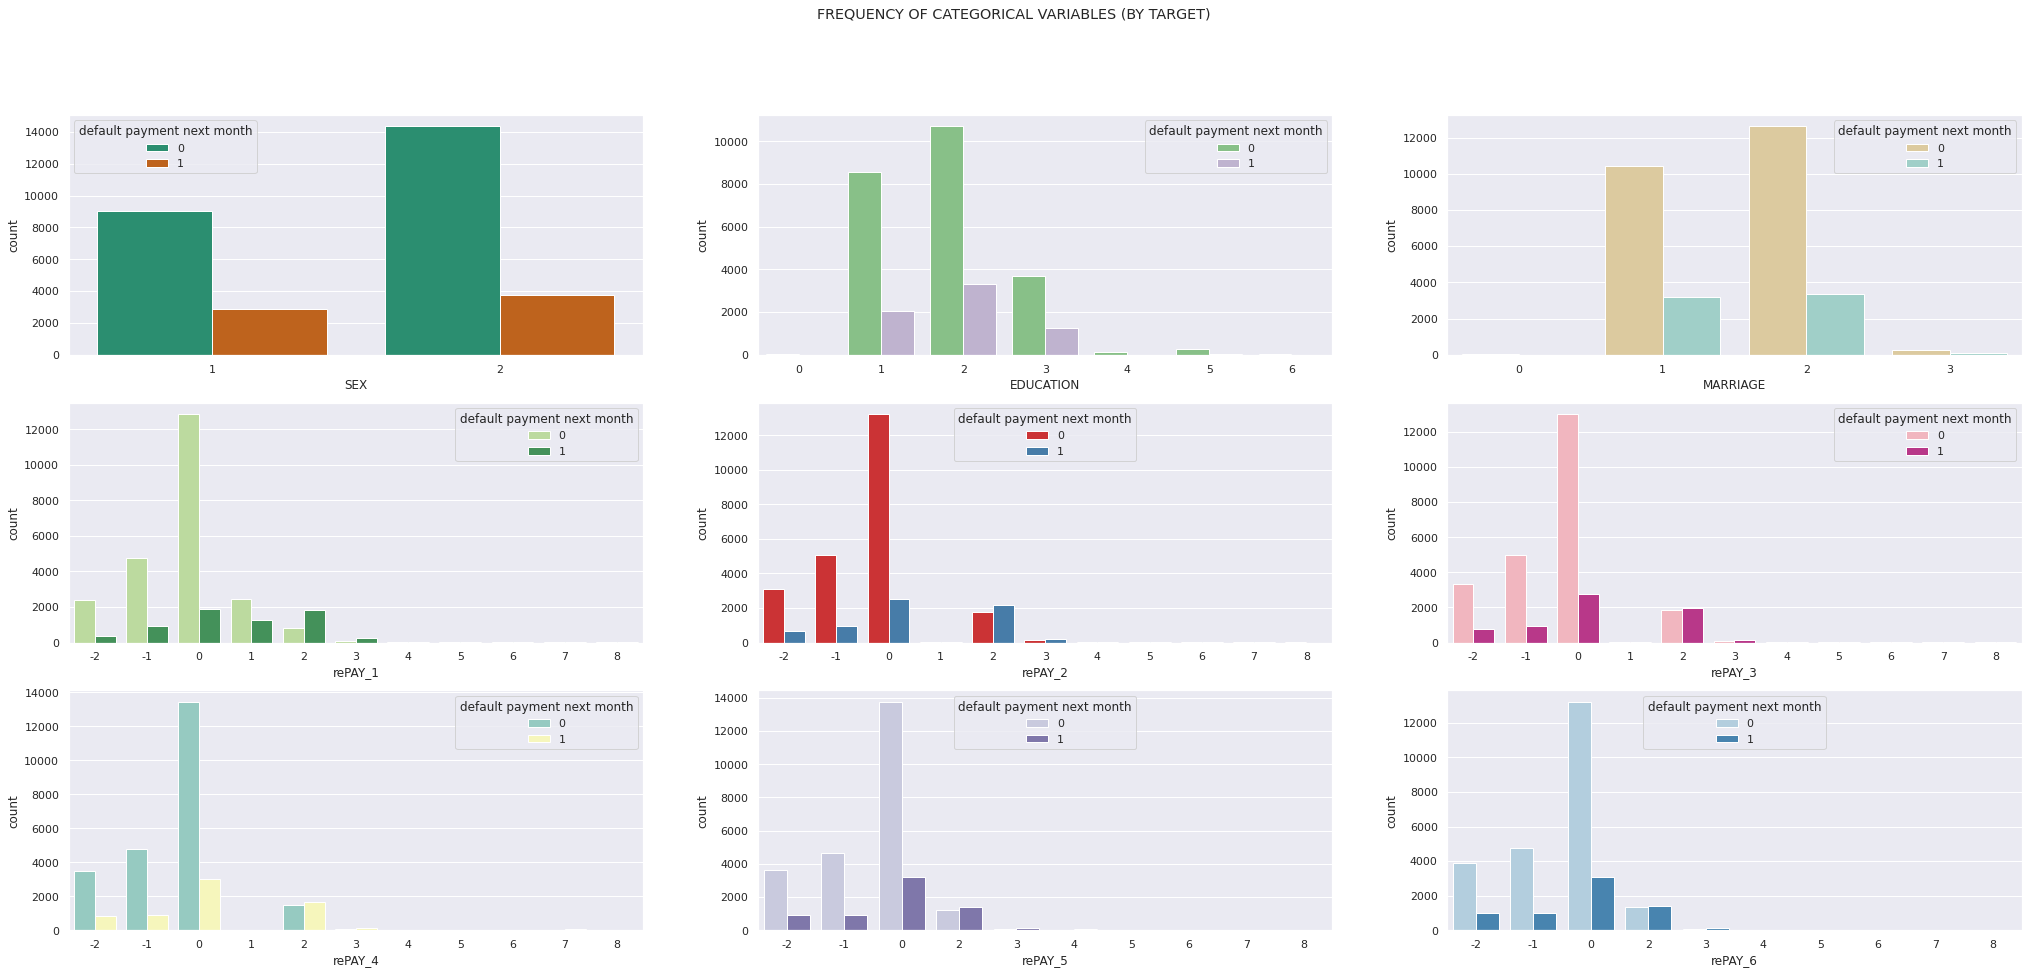

In [15]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'rePAY_1', 'rePAY_2', 'rePAY_3', 'rePAY_4', 
               'rePAY_5', 'rePAY_6', 'default payment next month']]

f, axes = plt.subplots(3, 3, figsize=(35, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default payment next month", data=subset, palette="Dark2", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=subset, palette="Accent",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=subset, palette="BrBG",ax=axes[0,2])
ax4 = sns.countplot(x="rePAY_1", hue="default payment next month", data=subset, palette="YlGn", ax=axes[1,0])
ax5 = sns.countplot(x="rePAY_2", hue="default payment next month", data=subset, palette="Set1", ax=axes[1,1])
ax6 = sns.countplot(x="rePAY_3", hue="default payment next month", data=subset, palette="RdPu", ax=axes[1,2])
ax7 = sns.countplot(x="rePAY_4", hue="default payment next month", data=subset, palette="Set3", ax=axes[2,0])
ax8 = sns.countplot(x="rePAY_5", hue="default payment next month", data=subset, palette="Purples", ax=axes[2,1])
ax9 = sns.countplot(x="rePAY_6", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,2]);

In [ ]:
df.value_counts('LIMIT_BAL')

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
690000        1
327680        1
760000        1
1000000       1
Length: 81, dtype: int64

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM')

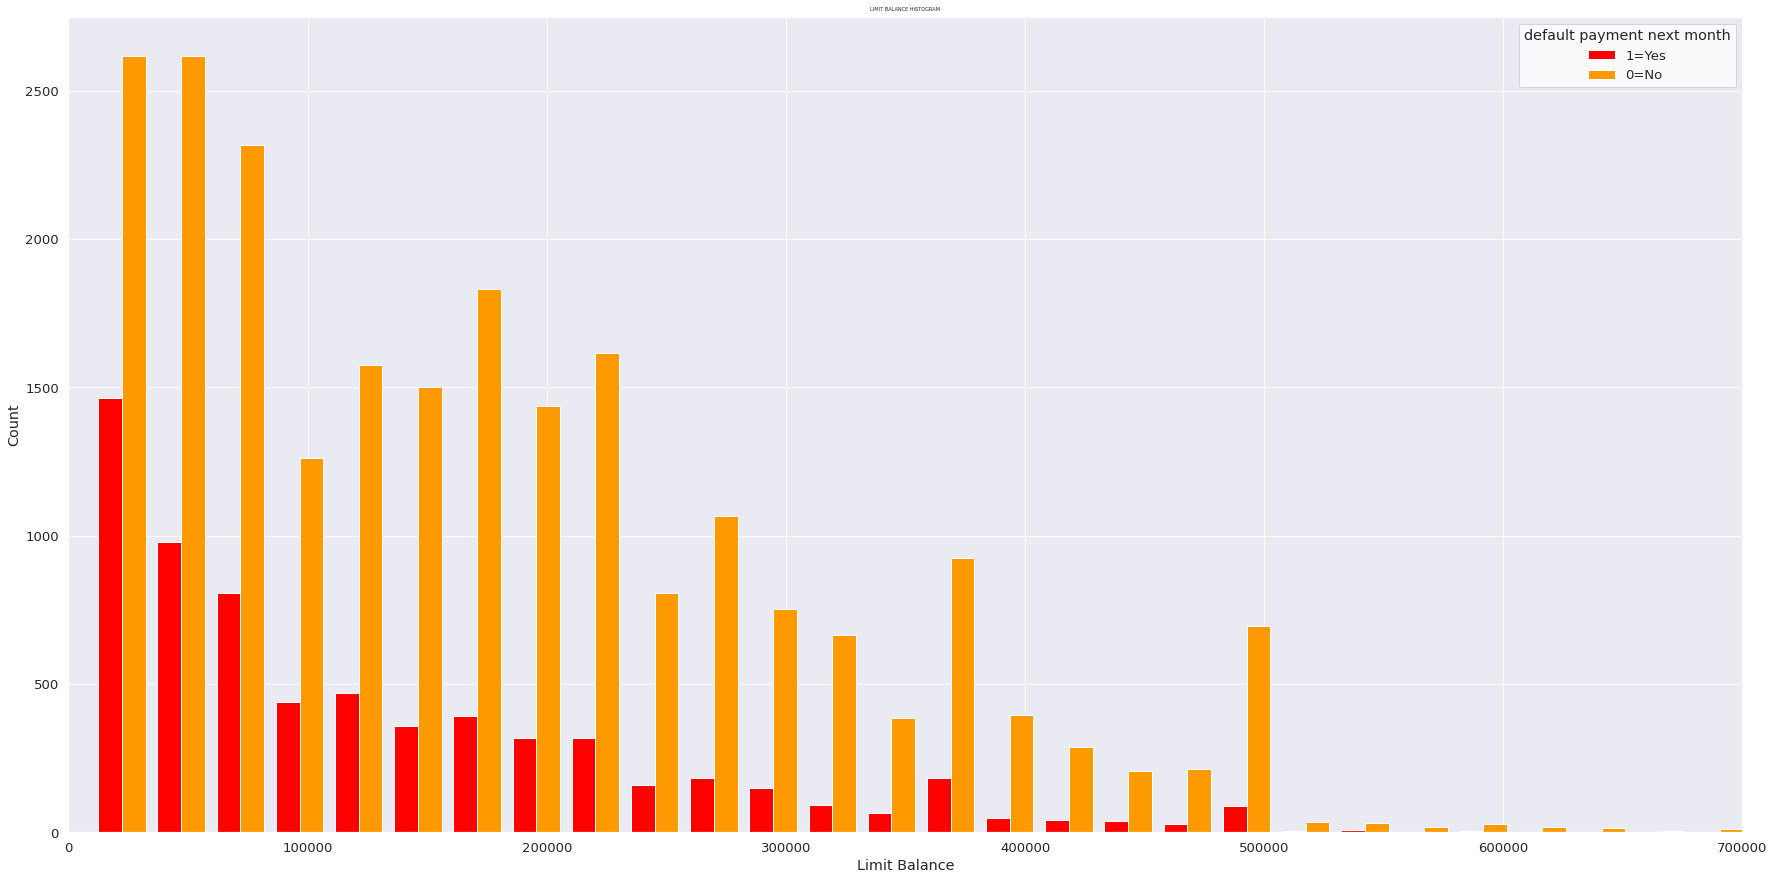

In [33]:
x = list(df[df['default payment next month'] == 1]['LIMIT_BAL'])
y = list(df[df['default payment next month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(30,15))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x, y], bins = 40, color=['#FF0000','#FF9900'])
plt.xlim([0,700000])
plt.legend(['1=Yes', '0=No'], title = 'default payment next month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title('LIMIT BALANCE HISTOGRAM', SIZE=5)

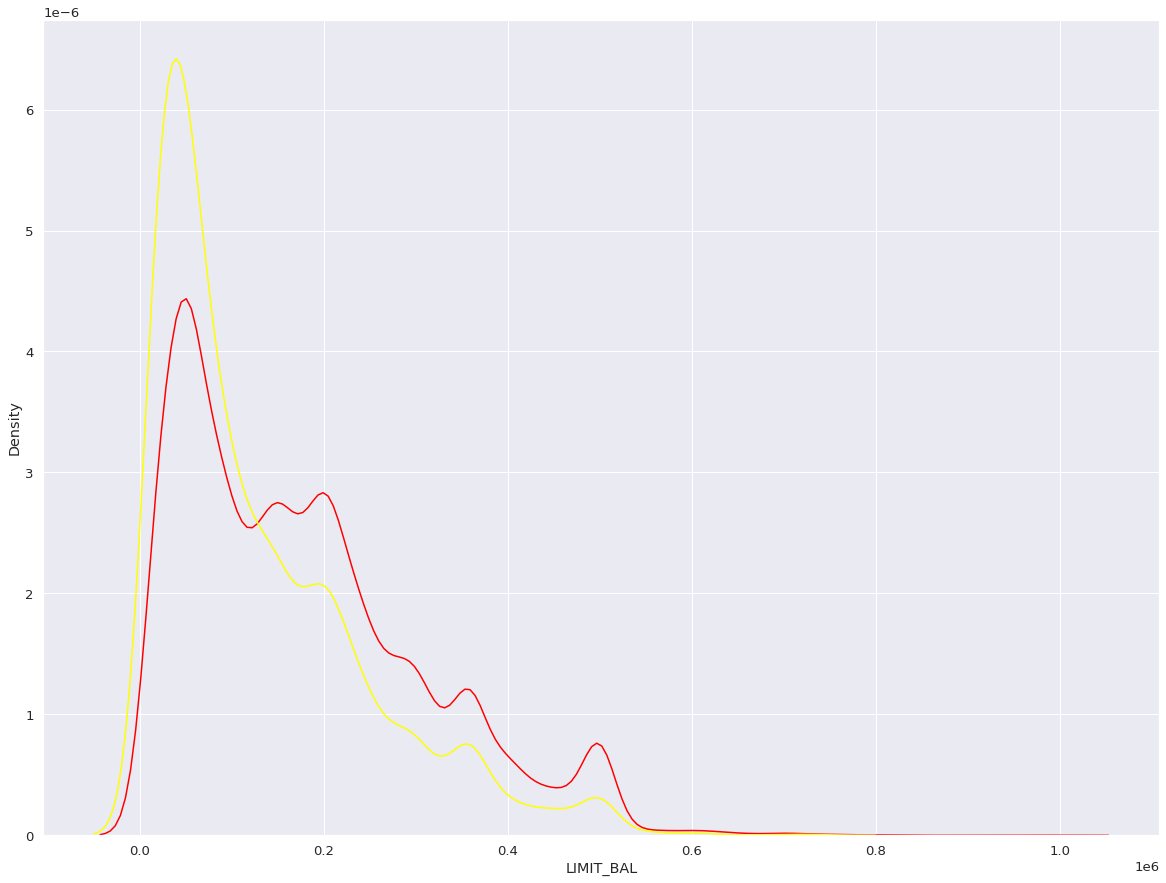

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['default payment next month'] == 0]['LIMIT_BAL'], hist=False, color="red") 
sns.distplot(df[df['default payment next month'] == 1]['LIMIT_BAL'], hist=False, color="yellow")
plt.show()

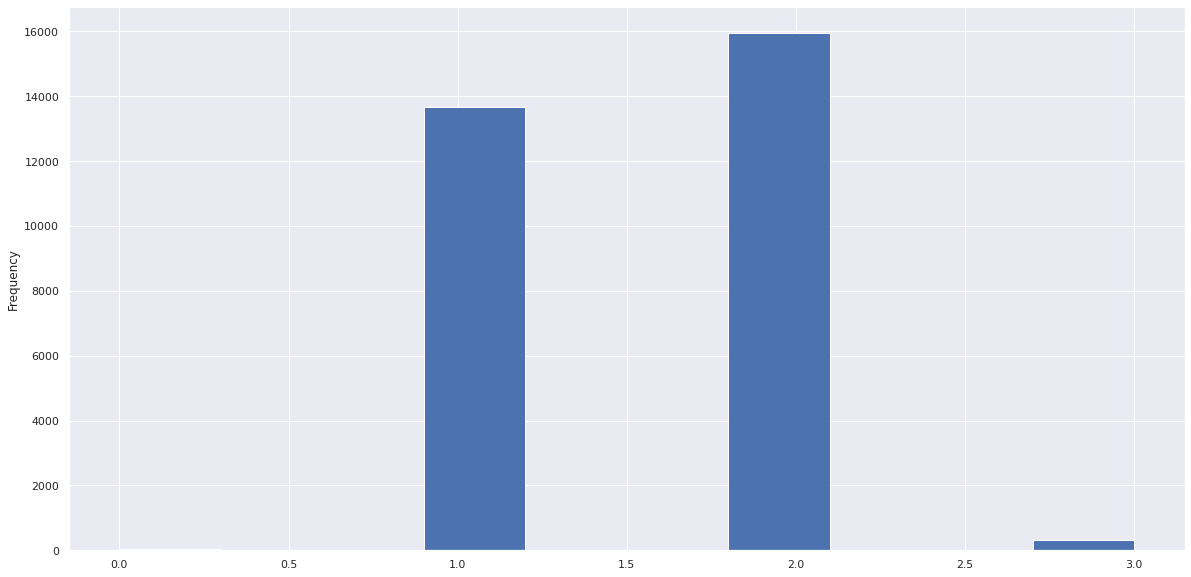

In [ ]:
plt.figure(figsize=(20,10))
df.MARRIAGE.plot(kind='hist' , grid = True)
plt.show()

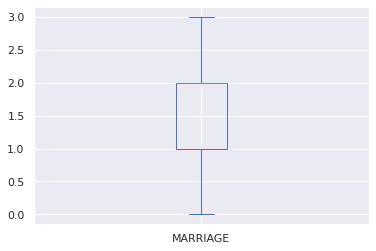

In [ ]:
df.MARRIAGE.plot(kind='box')

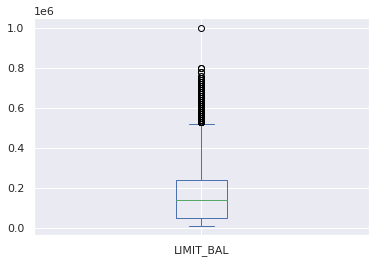

In [ ]:
df.LIMIT_BAL.plot(kind='box')

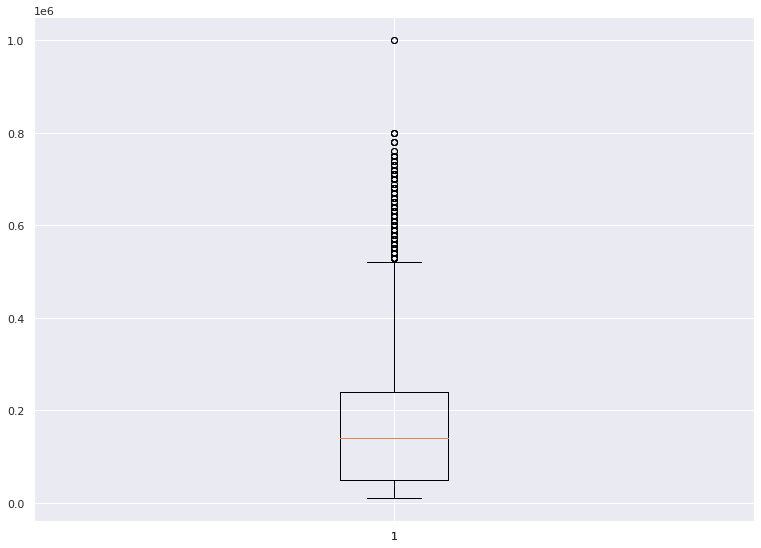

In [ ]:
data_1 = (df['LIMIT_BAL'])
# data = [data_1]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data_1)
plt.boxplot(data_1) 
# show plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


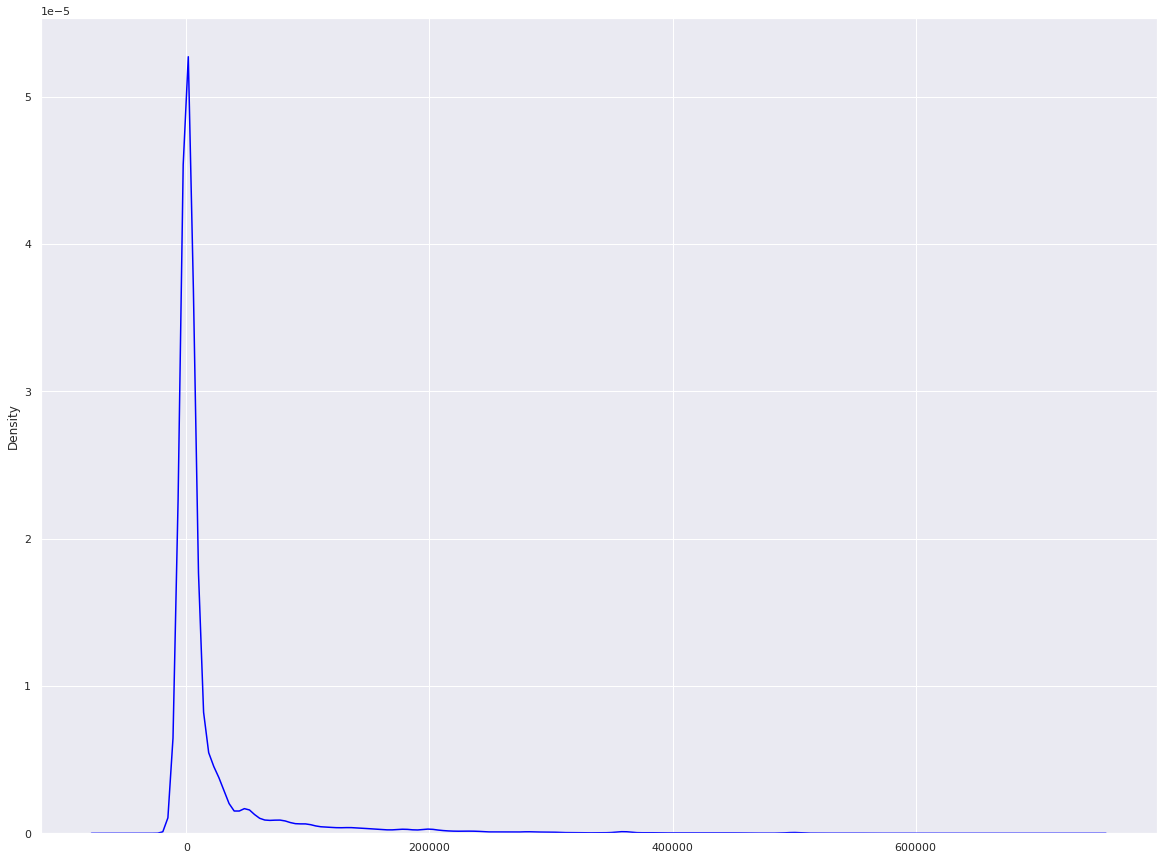

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df[(df['default payment next month']==1) & (df['MARRIAGE']==1)], hist=False, color="blue")
plt.show()

In [ ]:
long_english_movies = df[(df['default payment next month']==1) & (df['AGE']==29)]
long_english_movies.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
46,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
63,63,50000,1,1,2,29,2,2,2,2,...,25865,27667,28264,0,2700,0,2225,1200,0,1
72,72,320000,1,2,2,29,2,2,2,2,...,58622,62307,63526,2500,2500,0,4800,2400,1600,1
321,321,110000,1,2,2,29,1,2,2,0,...,48647,47862,47969,2500,0,2000,2000,1854,2000,1
348,348,50000,2,2,2,29,0,0,0,0,...,45545,39963,41145,3000,2000,2000,2000,2000,2000,1
405,405,160000,2,1,2,29,2,2,2,2,...,166893,170098,153800,7500,0,11558,5800,0,5654,1
612,612,360000,2,1,2,29,0,0,-2,-2,...,0,0,2650,0,0,0,0,2650,0,1
693,693,200000,2,2,1,29,2,0,0,0,...,119136,122211,125021,6163,4530,4500,5000,5000,5000,1
730,730,60000,1,1,2,29,-1,2,-1,-1,...,1173,732,1023,0,500,1000,0,582,0,1
857,857,40000,2,1,2,29,0,0,2,2,...,29361,33893,34487,3400,1500,0,5000,1300,0,1


In [ ]:
long_english_movies = df[(df['default payment next month']==1) & (df['SEX']==1)]
long_english_movies.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
14,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
17,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
27,27,60000,1,1,2,27,1,-2,-1,-1,...,-57,127,-189,0,1000,0,500,0,1000,1
32,32,50000,1,2,2,33,2,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,1
39,39,50000,1,1,2,25,1,-1,-1,-2,...,0,0,0,780,0,0,0,0,0,1
46,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
51,51,70000,1,3,2,42,1,2,2,2,...,39423,38659,39362,0,3100,2000,0,1500,1500,1
63,63,50000,1,1,2,29,2,2,2,2,...,25865,27667,28264,0,2700,0,2225,1200,0,1
66,66,200000,1,1,1,57,-2,-2,-2,-1,...,8174,8198,7918,0,0,8222,300,0,1000,1
67,67,10000,1,2,1,56,2,2,2,0,...,4062,4196,4326,2300,0,150,200,200,160,1


In [ ]:
new = df[df['default payment next month'] == ('SEX'==1)]
new.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
11,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
12,12,260000,2,1,2,51,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0


In [ ]:
df.value_counts('default payment next month')

default payment next month
0    23364
1     6636
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


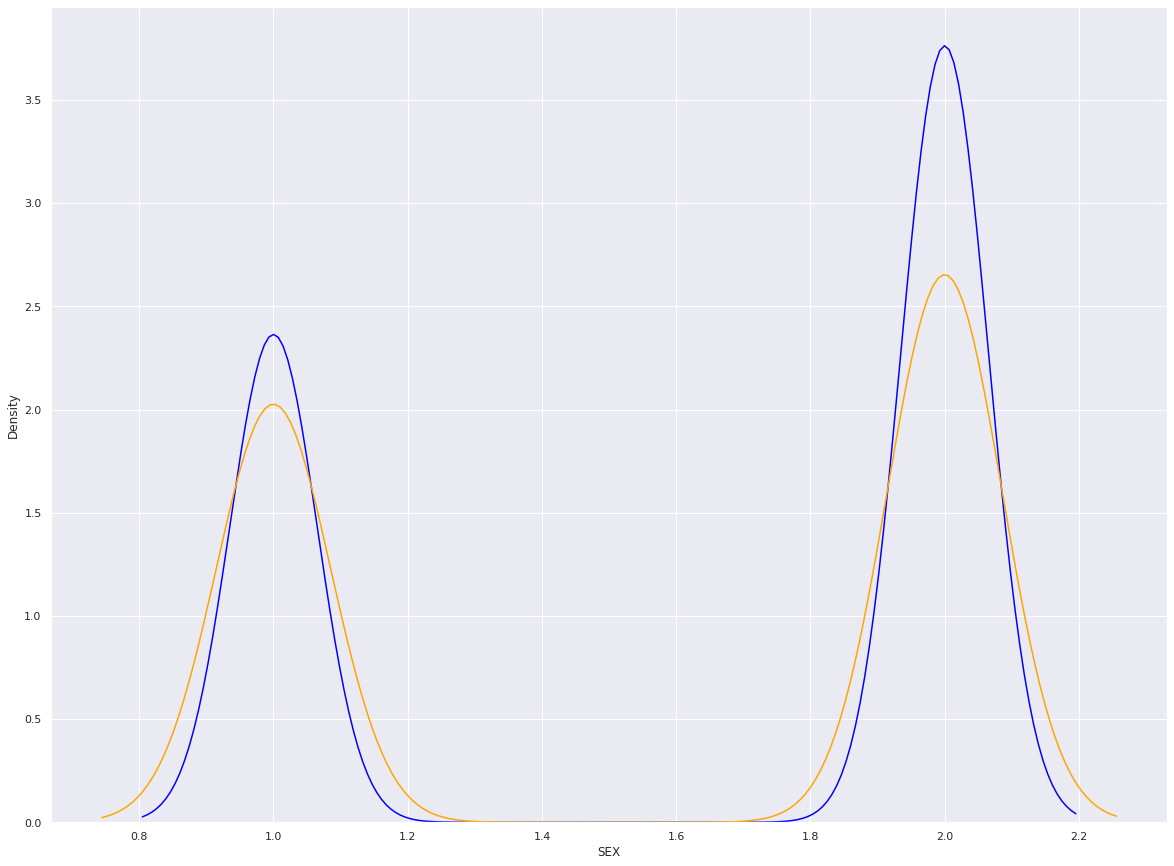

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['default payment next month'] == 0]['SEX'], hist=False, color="blue") 
sns.distplot(df[df['default payment next month'] == 1]['SEX'], hist=False, color="orange")
plt.show()

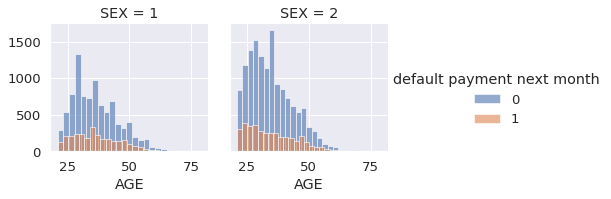

In [41]:
g = sns.FacetGrid(df, col='SEX', hue='default payment next month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()